In [1276]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1277]:
loan_data = pd.read_csv("loan.csv")
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1278]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [1279]:
print("Number of Rows in the Dataset=",loan_data.shape[0] ,"\nNumber of Columns in the DataSet=",loan_data.shape[1])

Number of Rows in the Dataset= 39717 
Number of Columns in the DataSet= 111


In [1280]:
#Dropping columns with all null values
loan_data.dropna(how='all',inplace=True,axis=1)
loan_data.shape

(39717, 57)

### Identifying and Removing Single-Valued Columns

*Columns with a single unique value do not provide useful information for our analysis. Therefore, we will remove these columns.*

In [1282]:
single_valued_columns = [col for col in loan_data.columns if loan_data[col].nunique() <= 1]
loan_data.drop(single_valued_columns, axis=1, inplace=True)
loan_data.shape
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### Removing Irrelevant Columns

*Columns such as `id`, `member_id`, `url`, `zip_code`, `last_credit_pull_d`, and `desc` do not contribute to loan risk analysis. Hence, we will remove these columns from the dataset.*

In [1284]:
loan_data.drop(['id','member_id','url','zip_code','last_credit_pull_d','desc','collection_recovery_fee','total_rec_late_fee','total_rec_int','delinq_2yrs','recoveries','delinq_2yrs','issue_d','earliest_cr_line','total_acc','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','last_pymnt_d','out_prncp_inv'],axis=1,inplace=True)

In [1285]:
loan_data.shape

(39717, 29)

In [1286]:
round(loan_data.isnull().mean()*100,2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_pymnt                0.00
last_pymnt_amnt            0.00
next_pymnt_d              97.13
pub_rec_bankruptcies       1.75
dtype: float64

### Removing Columns with More Than 60% Missing Values

*Columns with more than 60% missing values cannot be imputed without introducing bias into our analysis. Therefore, we will remove these columns.*

In [1288]:
missing_percentage=round(loan_data.isnull().mean()*100,2)
cols_to_remove=missing_percentage[round(loan_data.isnull().mean()*100,2)>=60].index.to_list()

In [1289]:
cols_to_remove

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [1290]:
loan_data.drop(cols_to_remove,axis=1,inplace=True)
loan_data.shape

(39717, 26)

### Filtering Loan Status for Analysis

*The objective of this analysis is to determine the likelihood of loan default. This can only be assessed for loans that are either fully paid or charged off.*

*Current loans cannot provide meaningful insights into default risk.*

*Therefore, we will exclude records with a current loan status from our dataset.*

In [1292]:
loan_data=loan_data[~(loan_data['loan_status']=='Current')]
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### Checking and Imputing Missing Values

*To ensure the quality of our data, we need to identify and handle missing values appropriately.*

*Imputing missing values helps maintain the integrity of the dataset without introducing bias.*

In [1294]:
missing_values=round(loan_data.isnull().mean()*100,2)
missing_values[missing_values>0]

emp_title               6.19
emp_length              2.68
title                   0.03
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64

### Handling Missing Values in Specific Columns

*The following columns have missing values:*

- *`emp_title`*
- *`emp_length`*
- *`title`*
- *`revol_util`*
- *`pub_rec_bankruptcies`*

*We will impute these missing values to maintain the integrity of our dataset.*


In [1296]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  title                 38

In [1297]:
loan_data.emp_title.value_counts()

emp_title
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: count, Length: 28027, dtype: int64

In [1298]:
loan_data.emp_title.fillna("Unknown",inplace=True)
loan_data.emp_title.isnull().sum()

0

In [1299]:
print("Mode:",loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode: 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### Imputing Missing Values with Mode

*The value counts for the `emp_length` column are as follows:*
*The mode value (`10+ years`) has a significantly higher frequency than the next most frequent value.*

*This indicates that we can safely assign the mode value to the null values in the `emp_length` column.*

*Additionally, the percentage of missing values is very low. Imputing with the mode value does not significantly affect our analysis.*




In [1301]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0],inplace=True)
loan_data.emp_length.isnull().sum()

0

### Imputing Missing Values in Loan Purpose with Mode

*The `purpose` column indicates the reason for taking out a loan. One common purpose is `consolidation`, which is the mode of this column.*

*Since `consolidation` is the most frequent value, we can safely use it to fill any missing values in the `purpose` column.*

*Using the mode for imputation ensures that we maintain the integrity of the data without introducing significant bias, especially given the low percentage of missing values.*

In [1303]:
loan_data.title.value_counts()
loan_data['title']=loan_data.title.apply(lambda x:'Consolidation' if 'consolidation' in str(x).lower() else str(x))

In [1304]:
loan_data.title.value_counts()

title
Consolidation                               8485
Personal Loan                                641
Home Improvement                             345
Small Business Loan                          305
Credit Card Loan                             301
                                            ... 
Home Remodeling - Add Bedroom & 1/2 Bath       1
Debt Consolitdation                            1
Pay me off                                     1
full moon                                      1
JAL Loan                                       1
Name: count, Length: 17891, dtype: int64

In [1305]:
loan_data.title.fillna(loan_data.title.mode()[0],inplace=True)
loan_data.title.isna().sum()

0

In [1306]:
loan_data.dropna(axis=0,subset=['revol_util'],inplace=True)
loan_data.revol_util.isna().sum()

0

In [1307]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36189
1.0     1636
2.0        5
Name: count, dtype: int64

In [1308]:
loan_data.pub_rec_bankruptcies.fillna(loan_data.pub_rec_bankruptcies.mode()[0],inplace=True)
loan_data.pub_rec_bankruptcies.isna().sum()

0

Standardizing the data

- **revol_util**: Although described as an object column, it contains continuous values. Standardization is necessary for this column.
- **int_rate**: Standardize data in this column.
- **emp_length**: Convert values to numeric format: `(< 1 year)` assumed as `0` and `10+ years` assumed as `10`.
- **term**: Consider declaring as a categorical variable due to having only two values.


In [1310]:
loan_data.revol_util = loan_data.revol_util.apply(lambda x : float(x.replace('%',"")))
loan_data.int_rate = loan_data.int_rate.apply(lambda x : float(x.replace('%',"")))


In [1311]:
loan_data.emp_length=loan_data.emp_length.str.extract("(\d+)")
loan_data.emp_length=loan_data.emp_length.apply(lambda x:int(x))
loan_data.head(2)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Unknown,10,...,AZ,27.65,1,3,0,13648,83.7,5863.155187,171.62,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,GA,1.00,5,3,0,1687,9.4,1008.710000,119.66,0.0


In [1312]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38527 non-null  int64  
 1   funded_amnt           38527 non-null  int64  
 2   funded_amnt_inv       38527 non-null  float64
 3   term                  38527 non-null  object 
 4   int_rate              38527 non-null  float64
 5   installment           38527 non-null  float64
 6   grade                 38527 non-null  object 
 7   sub_grade             38527 non-null  object 
 8   emp_title             38527 non-null  object 
 9   emp_length            38527 non-null  int64  
 10  home_ownership        38527 non-null  object 
 11  annual_inc            38527 non-null  float64
 12  verification_status   38527 non-null  object 
 13  loan_status           38527 non-null  object 
 14  purpose               38527 non-null  object 
 15  title                 38

<div class="bg-blue-50 border-l-4 border-blue-500 p-4">
    
### Outlier Detection and Removal Using Boxplots

Use boxplots to detect and remove outliers in your dataset:


</div>

<Axes: >

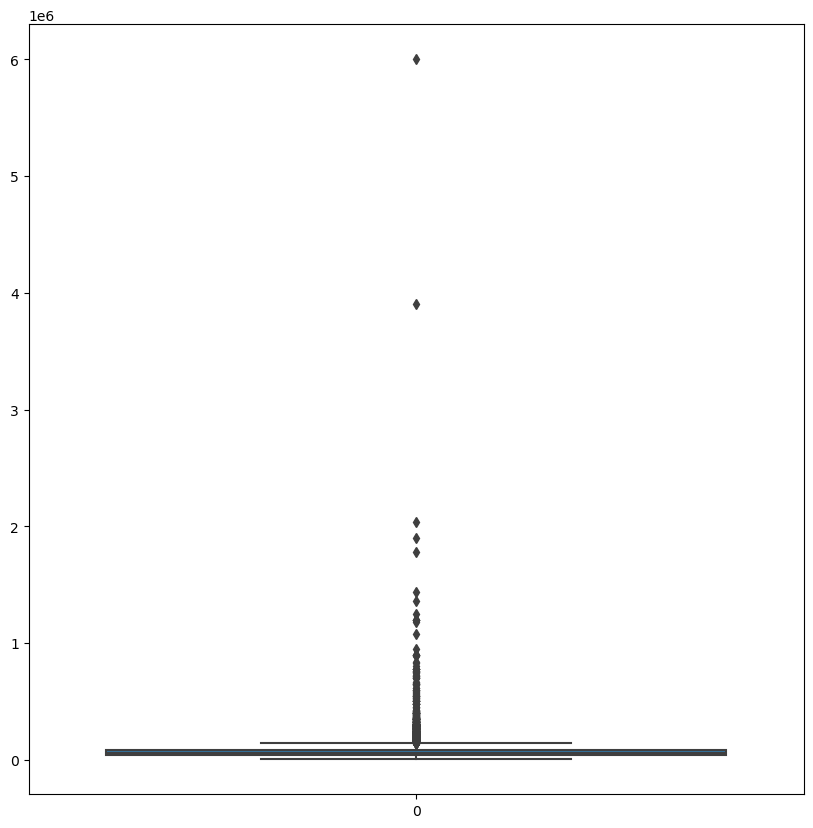

In [1314]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.annual_inc)

In [1315]:
loan_data.annual_inc.describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

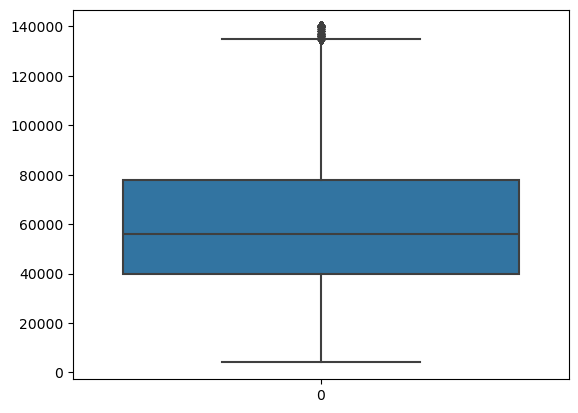

In [1316]:
ninety_five_perc=loan_data.annual_inc.quantile(0.95)
loan_data=loan_data[loan_data.annual_inc<ninety_five_perc]
sns.boxplot(loan_data.annual_inc)

<Axes: >

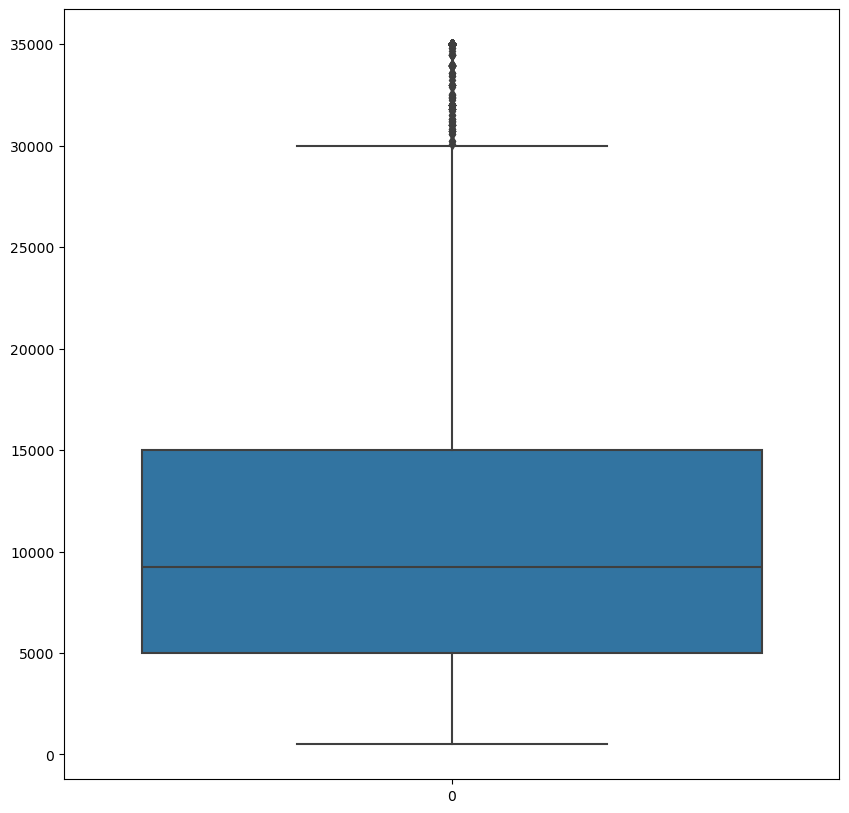

In [1317]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.loan_amnt)

In [1318]:
loan_data.loan_amnt.quantile([.5,.75,.9,.95,.99])

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [1319]:
loan_data=loan_data[loan_data.loan_amnt<=loan_data.loan_amnt.quantile(.95)]

<Axes: >

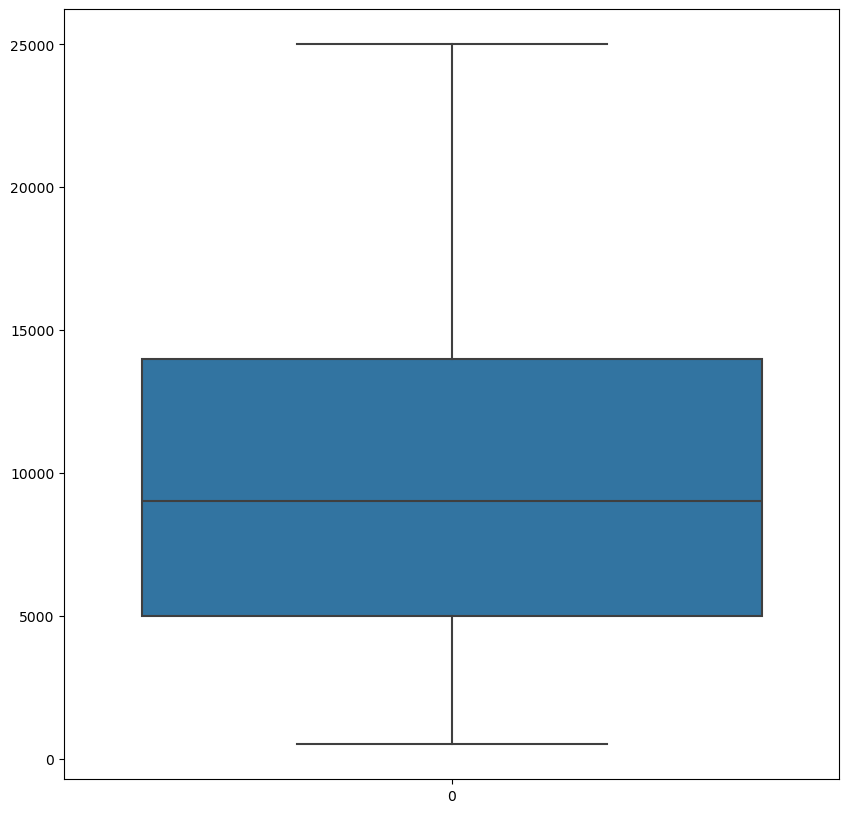

In [1320]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.loan_amnt)

In [1321]:
loan_data.funded_amnt.quantile([.5,.75,.9,.95,.99])

0.50     8837.5
0.75    13600.0
0.90    19000.0
0.95    21000.0
0.99    25000.0
Name: funded_amnt, dtype: float64

<Axes: >

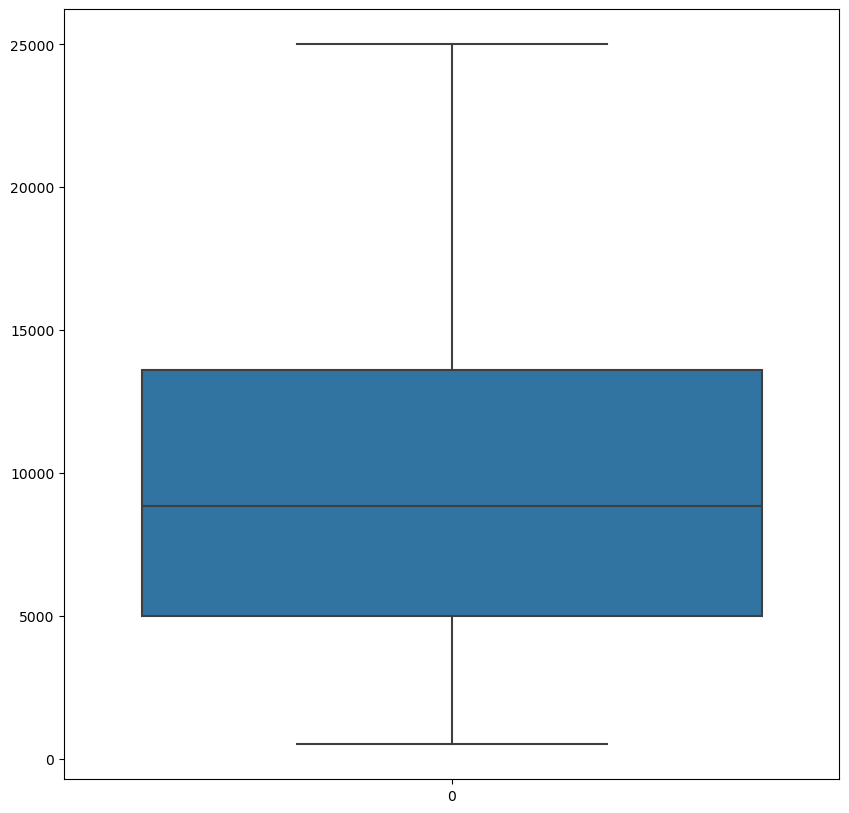

In [1322]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.funded_amnt)

*__No outliers found, so no need to remove any rows for funded amount.__*

<Axes: >

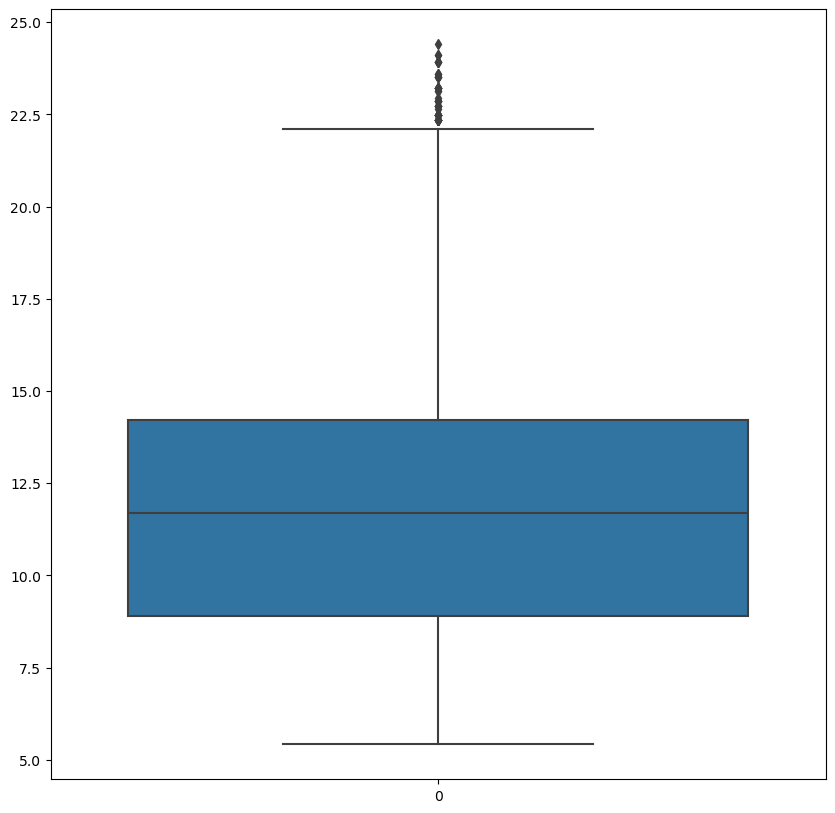

In [1324]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.int_rate)

<Axes: >

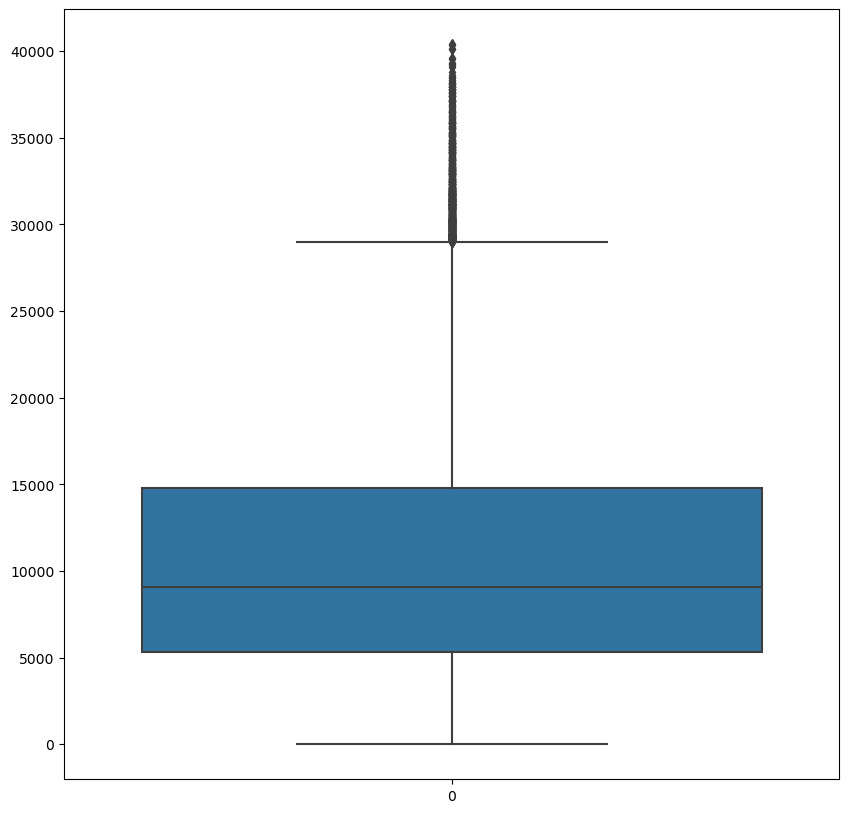

In [1325]:
plt.figure(figsize=(10,10))
sns.boxplot(loan_data.total_pymnt)

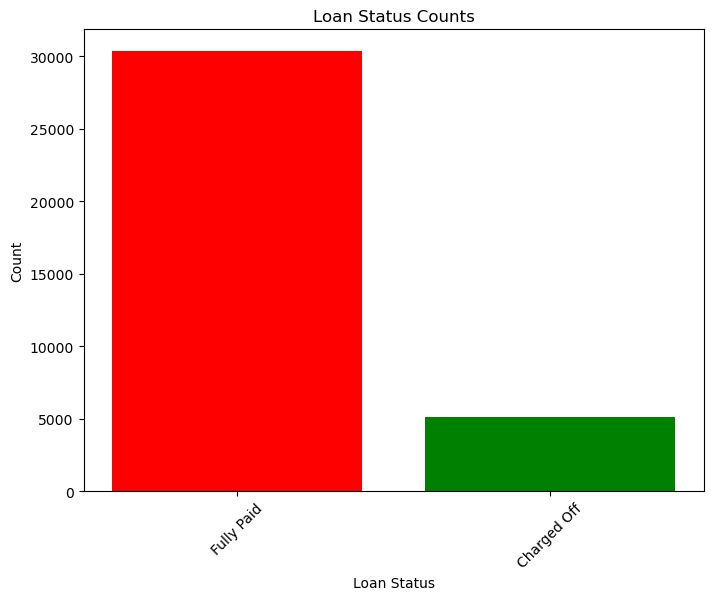

In [1326]:
loan_status_counts = loan_data['loan_status'].value_counts()
categories = loan_status_counts.index
values = loan_status_counts.values

plt.figure(figsize=(8, 6))  
plt.bar(categories, values,color=['red','green'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Counts')
plt.xticks(rotation=45) 
plt.show()


HEAT MAP WITH ALL NUMERIC VALUES

In [1328]:
col_data_type=loan_data.select_dtypes(include=["int64","float64"])
col_data_type

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,10.65,162.87,10,24000.0,27.65,1,3,0,13648,83.7,5863.155187,171.62,0.0
1,2500,2500,2500.0,15.27,59.83,1,30000.0,1.00,5,3,0,1687,9.4,1008.710000,119.66,0.0
2,2400,2400,2400.0,15.96,84.33,10,12252.0,8.72,2,2,0,2956,98.5,3005.666844,649.91,0.0
3,10000,10000,10000.0,13.49,339.31,10,49200.0,20.00,1,10,0,5598,21.0,12231.890000,357.48,0.0
5,5000,5000,5000.0,7.90,156.46,3,36000.0,11.20,3,9,0,7963,28.3,5632.210000,161.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,8.70,158.30,5,75000.0,15.55,0,10,0,66033,23.0,5698.603286,159.83,0.0
39712,2500,2500,1075.0,8.07,78.42,4,110000.0,11.33,0,13,0,7274,13.1,2822.969293,80.90,0.0
39713,8500,8500,875.0,10.28,275.38,3,18000.0,6.40,1,6,0,8847,26.9,9913.491822,281.94,0.0
39714,5000,5000,1325.0,8.07,156.84,1,100000.0,2.30,0,11,0,9698,19.4,5272.161128,0.00,0.0


<Axes: >

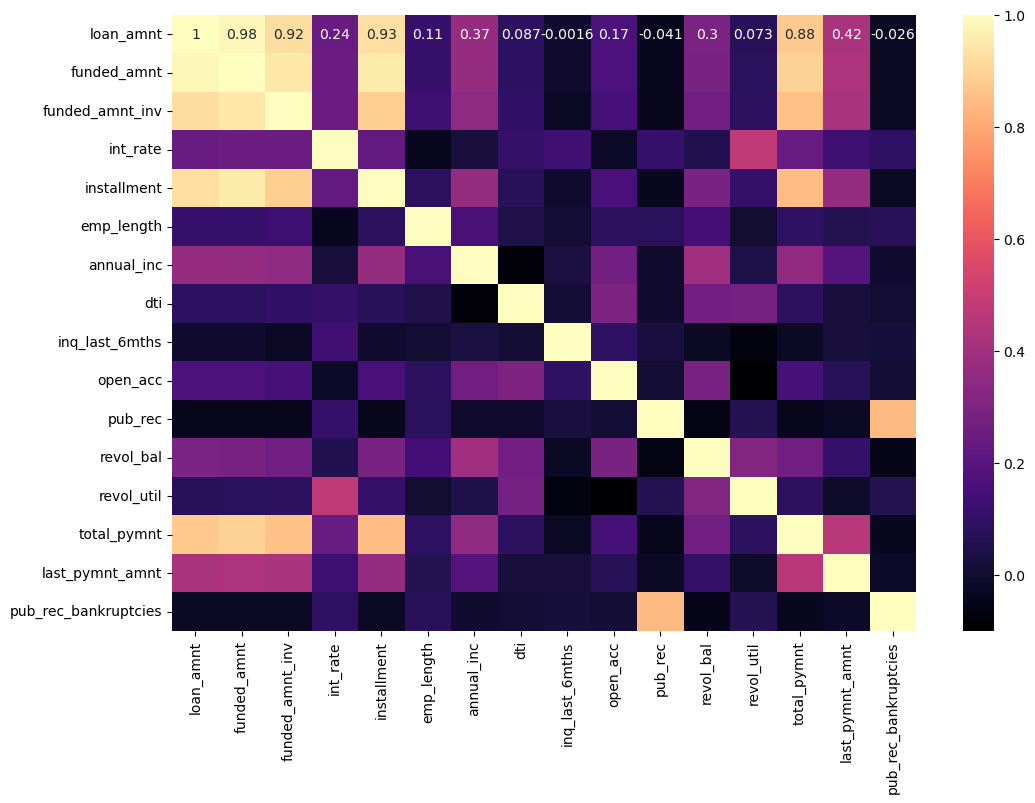

In [1329]:
plt.figure(figsize=(12, 8))
sns.heatmap(col_data_type.corr(), annot=True, cmap='magma')

<div align="center">

# **<span style="background-color:green; font-size:30px;">Univariate Analysis</span>**

</div>

UNIVARIATE ANALYSIS WITH ALL AMOUNT DATA-LOAN AMOUNT,FUNDED AMOUNT,ANNUAL INCOME,TOTAL PAYMENT

In [1332]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35478 non-null  int64  
 1   funded_amnt           35478 non-null  int64  
 2   funded_amnt_inv       35478 non-null  float64
 3   term                  35478 non-null  object 
 4   int_rate              35478 non-null  float64
 5   installment           35478 non-null  float64
 6   grade                 35478 non-null  object 
 7   sub_grade             35478 non-null  object 
 8   emp_title             35478 non-null  object 
 9   emp_length            35478 non-null  int64  
 10  home_ownership        35478 non-null  object 
 11  annual_inc            35478 non-null  float64
 12  verification_status   35478 non-null  object 
 13  loan_status           35478 non-null  object 
 14  purpose               35478 non-null  object 
 15  title                 35

[Text(0.5, 1.0, 'Distribution plot for Total Payment'),
 Text(0.5, 0, 'Total Payment')]

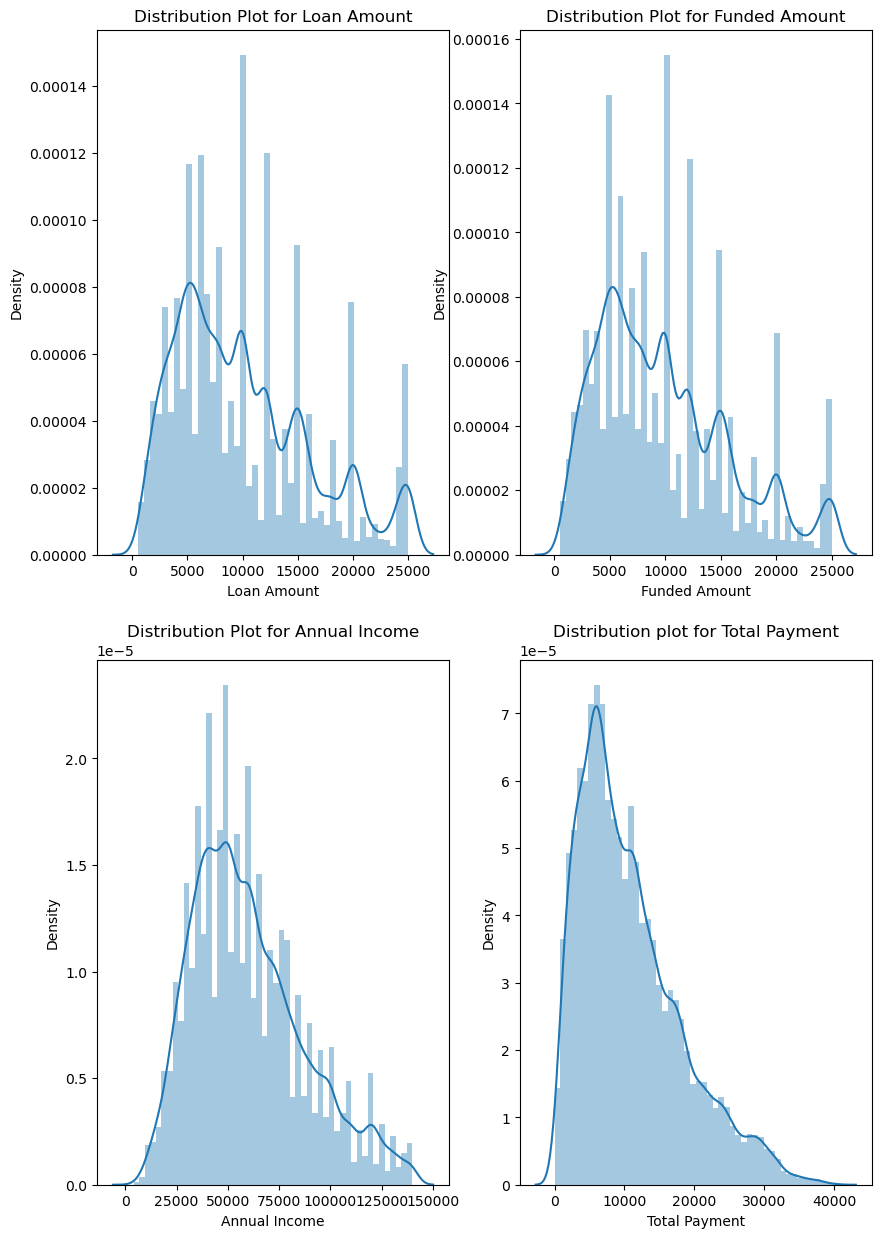

In [1333]:
plt.figure(figsize=(10,15))

plt.subplot(2,2,1)
axis_1=sns.distplot(loan_data.loan_amnt)
axis_1.set(title='Distribution Plot for Loan Amount',xlabel='Loan Amount')

plt.subplot(2,2,2)
axis_1=sns.distplot(loan_data.funded_amnt)
axis_1.set(title='Distribution Plot for Funded Amount',xlabel='Funded Amount')

plt.subplot(2,2,3)
axis_1=sns.distplot(loan_data.annual_inc)
axis_1.set(title='Distribution Plot for Annual Income',xlabel='Annual Income')

plt.subplot(2,2,4)
axis_1=sns.distplot(round(loan_data.total_pymnt))
axis_1.set(title='Distribution plot for Total Payment', xlabel='Total Payment')




Observations -

    The amount distributions for all four amount categories exhibit a comparable shape &  shows a high degree of similarity.


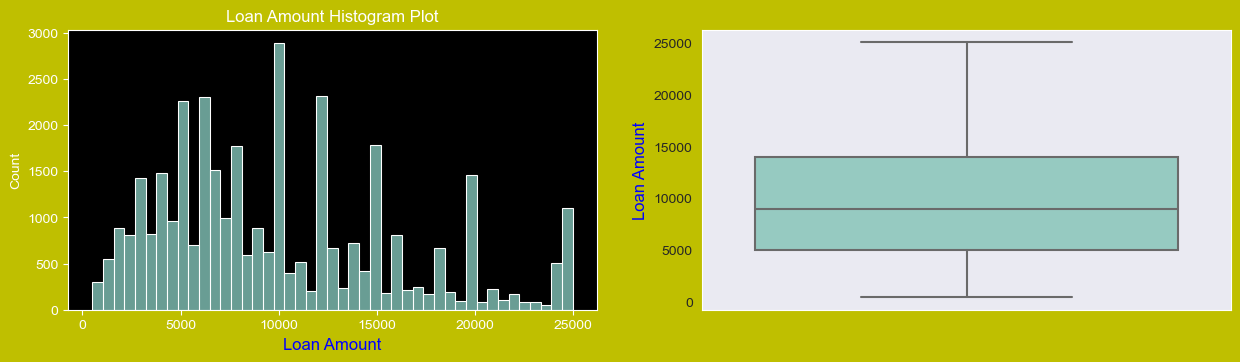

In [1335]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='y')
  
  #Subplot 1

  plt.subplot(2,2,1)
  ax=sns.histplot(loan_data.loan_amnt)
  ax.set(title='Loan Amount Histogram Plot')
  ax.set_xlabel('Loan Amount', fontsize=12,color='b')

  #Subplot 2
  sns.set_style("dark")

  plt.subplot(2,2,2)
  ax=sns.boxplot(y=loan_data.loan_amnt)
  ax.set_ylabel('Loan Amount', fontsize=12,color='b')
  plt.show()

OBESERVATION

**_The majority of loan amounts fall within the range of 5000 to 15000_**

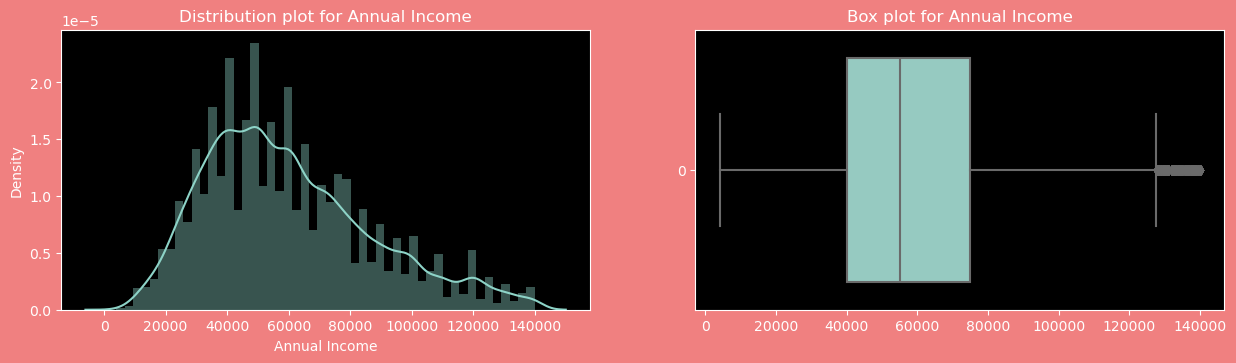

In [1337]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8),facecolor='lightcoral')
    plt.subplot(2,2,1)
    axis1=sns.distplot(loan_data.annual_inc)
    axis1.set(title='Distribution plot for Annual Income',xlabel='Annual Income')
    plt.subplot(2,2,2)
    axis1=sns.boxplot(loan_data.annual_inc ,orient='h')
    axis1.set(title='Box plot for Annual Income')
    

OBESERVATION

**_The majority of Annual Income fall within the range of 40000 to 80000_**

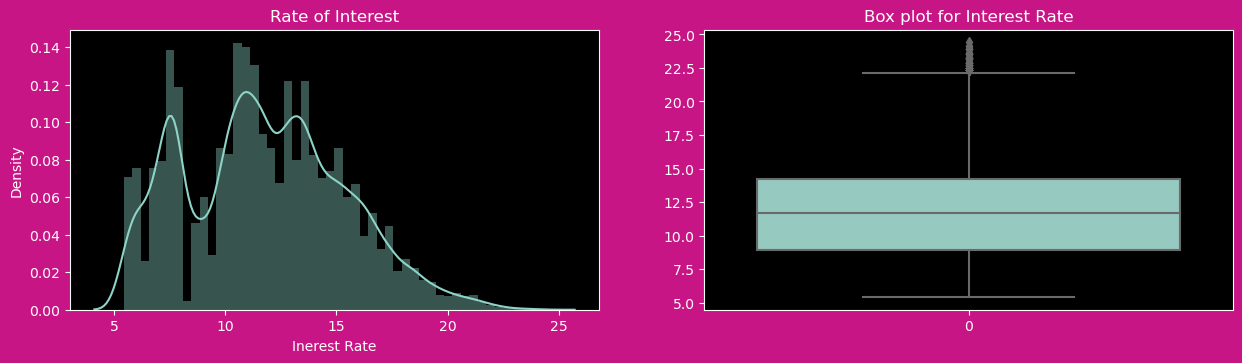

In [1339]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(15,8),facecolor='mediumvioletred')
    plt.subplot(2,2,1)
    axis1=sns.distplot(loan_data.int_rate)
    axis1.set(title='Rate of Interest',xlabel='Inerest Rate')
    plt.subplot(2,2,2)
    axis1=sns.boxplot(loan_data.int_rate)
    axis1.set(title='Box plot for Interest Rate')

OBESERVATION

*Interest Rate between 9-14%*


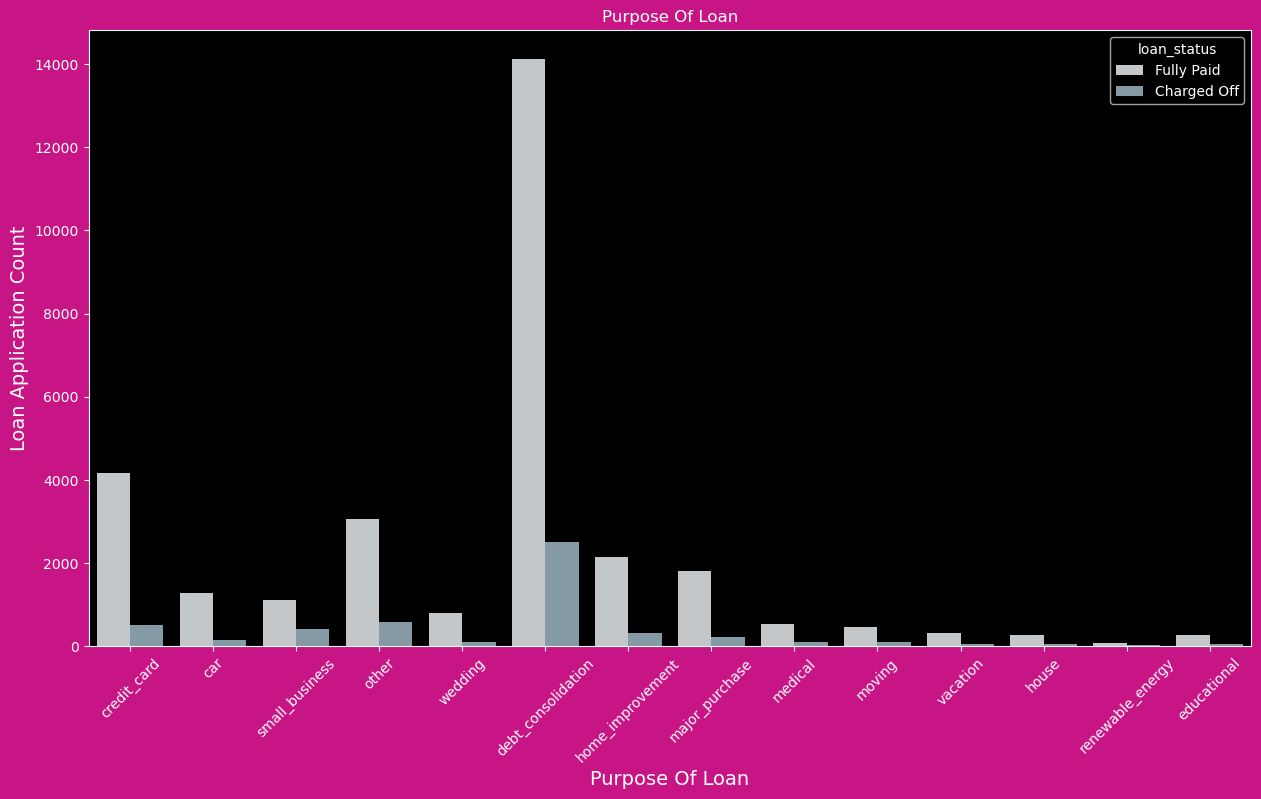

In [1341]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(15,8),facecolor='mediumvioletred')
  ax=sns.countplot(x="purpose",data=loan_data,hue='loan_status',palette='RdBu_d')
  plt.xticks(rotation=45)
  ax.set(title='Purpose Of Loan')
  ax.set_xlabel('Purpose Of Loan',fontsize=14,color='w')
  ax.set_ylabel('Loan Application Count',fontsize=14,color='w')
   
    

Observations -
*The count plot shows that debt consolidation accounted for the majority of loans taken out. 
Furthermore, a very high number of loans that have been charged off are connected to these uses.*


# **<span style="background-color:yellow; font-size:24px;">Bivariate Analysis</span>**

The table below shows the correlation matrix for numerical variables:

In [1344]:
correlation_matrix=col_data_type.corr()
correlation_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981061,0.924853,0.241479,0.928250,0.110359,0.368091,0.086909,-0.001636,0.166416,-0.040693,0.295380,0.072966,0.875689,0.419990,-0.026370
funded_amnt,0.981061,1.000000,0.944241,0.251257,0.954810,0.110076,0.364159,0.086311,-0.001230,0.163901,-0.040214,0.286688,0.077822,0.892707,0.425446,-0.025964
funded_amnt_inv,0.924853,0.944241,1.000000,0.245970,0.886013,0.126387,0.345198,0.095943,-0.017968,0.149166,-0.041611,0.264095,0.083012,0.861026,0.417865,-0.026083
int_rate,0.241479,0.251257,0.245970,1.000000,0.226260,-0.031102,0.024118,0.105435,0.134731,-0.016964,0.108245,0.058660,0.472955,0.242395,0.127393,0.090667
installment,0.928250,0.954810,0.886013,0.226260,1.000000,0.081084,0.362790,0.074001,-0.001546,0.158707,-0.035820,0.283844,0.104507,0.848523,0.360515,-0.023249
emp_length,0.110359,0.110076,0.126387,-0.031102,0.081084,1.000000,0.154387,0.048902,0.007495,0.084132,0.076763,0.144030,-0.000321,0.092425,0.060706,0.076515
annual_inc,0.368091,0.364159,0.345198,0.024118,0.362790,0.154387,1.000000,-0.078618,0.029787,0.262497,-0.005662,0.390400,0.045442,0.349826,0.186699,-0.002599
dti,0.086909,0.086311,0.095943,0.105435,0.074001,0.048902,-0.078618,1.000000,0.008624,0.296377,-0.006815,0.267256,0.275149,0.082513,0.023280,0.005087
inq_last_6mths,-0.001636,-0.001230,-0.017968,0.134731,-0.001546,0.007495,0.029787,0.008624,1.000000,0.091822,0.027284,-0.025308,-0.066776,-0.023139,0.021509,0.016739
open_acc,0.166416,0.163901,0.149166,-0.016964,0.158707,0.084132,0.262497,0.296377,0.091822,1.000000,0.006148,0.284927,-0.099408,0.147776,0.070925,0.010597


### Observations
1. **Loan amount, funding amount, and funded amount invested are strongly correlated**: These three variables are closely related, indicating that as one increases, the others tend to increase as well.
2. **Interest rate and employee length are negatively correlated**: This suggests that longer employee tenure is associated with lower interest rates, possibly reflecting lower risk for long-term employed individuals.
3. **Delinquency in the past 2 years and inquiries in the last 6 months are positively correlated with the interest rate**: This suggests a tendency towards higher interest rates for borrowers with recent delinquencies and numerous recent credit inquiries, indicating a higher risk of default.
4. **Annual income is positively correlated with loan amount, revol_bal, and total payment**: Higher income individuals tend to take out larger loans, have higher revolving balances, and make higher total payments.
5. **Debt-to-income (DTI) ratio is positively correlated with revolving balance**: This indicates that individuals with higher revolving balances tend to have higher debt-to-income ratios.
6. **Total payment is strongly correlated with loan amount, funded amount, and funded amount invested**: This shows that larger loans lead to higher total payments over time.

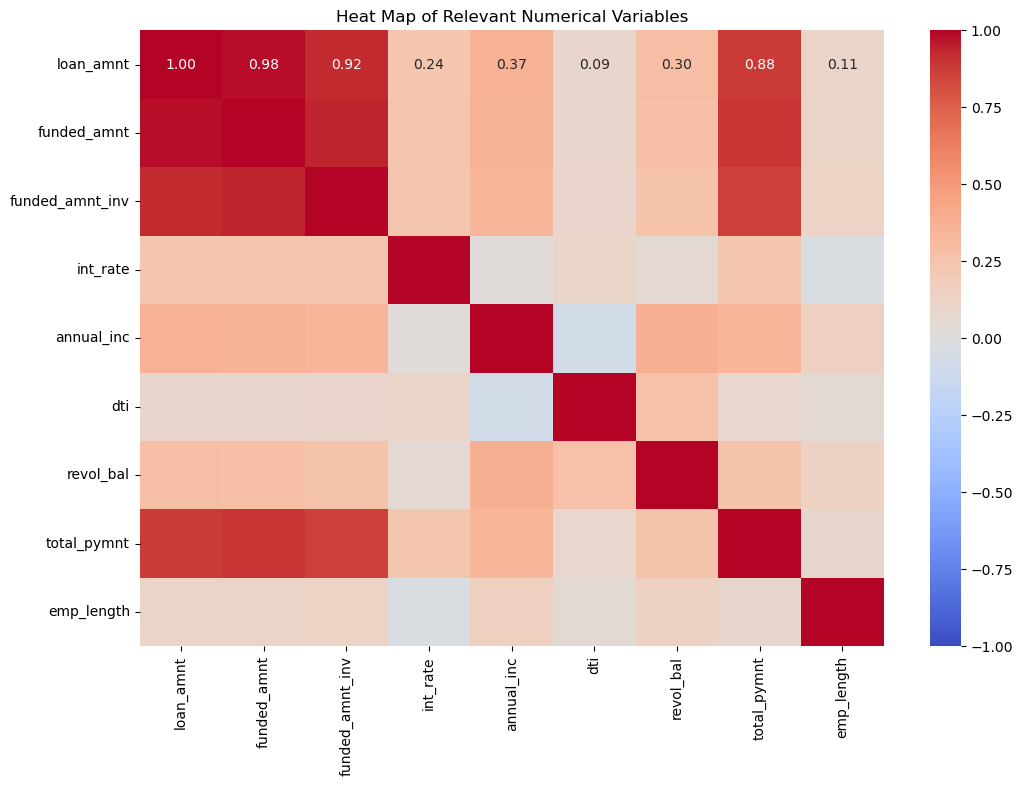

In [1346]:

# Selecting relevant columns for correlation analysis
selected_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'revol_bal', 'total_pymnt', 'emp_length']
loan_data_selected = loan_data[selected_columns]
# Calculate the correlation matrix for the selected columns
correlation_matrix = loan_data_selected.corr()

# Get the correlation of int_rate with other columns
int_rate_correlation = correlation_matrix['int_rate'].sort_values(ascending=False)

# Display the correlation matrix and the int_rate correlations
correlation_matrix, int_rate_correlation
plt.figure(figsize=(12, 8))
ax=sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title("Heat Map of Relevant Numerical Variables")
plt.show()

In [1347]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35478 non-null  int64  
 1   funded_amnt           35478 non-null  int64  
 2   funded_amnt_inv       35478 non-null  float64
 3   term                  35478 non-null  object 
 4   int_rate              35478 non-null  float64
 5   installment           35478 non-null  float64
 6   grade                 35478 non-null  object 
 7   sub_grade             35478 non-null  object 
 8   emp_title             35478 non-null  object 
 9   emp_length            35478 non-null  int64  
 10  home_ownership        35478 non-null  object 
 11  annual_inc            35478 non-null  float64
 12  verification_status   35478 non-null  object 
 13  loan_status           35478 non-null  object 
 14  purpose               35478 non-null  object 
 15  title                 35

# **<span style="background-color:green; font-size:24px;">Bi variate Analysis, Part One with loan status</span>**
*_In this section, we will compare the loan status to certain important columns that might have an impact on debts that have been charged off._*
* LOAN AMOUNT
* INTEREST RATE
* ANNUAL INCOME
* PURPOSE OF LOAN
* GRADE
* SUB GRADE
* EMP LENGTH (EMPLOYEE EXPERIENCE)
* VERIFICATION STATUS
* ADDRESS STATE
* PUB_REC_BANKRUPTICIES (BANKRUPTICIES)


In [1349]:
loan_data.loan_amnt.describe()

count    35478.000000
mean     10036.812250
std       6079.103751
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      25000.000000
Name: loan_amnt, dtype: float64

In [1350]:
#Bin Creation for loan amount with 6 bins with 5000 intervals
loan_data["loan_amnt_cat"]=pd.cut(loan_data.loan_amnt,[0,5000,10000,15000,20000,25000],labels=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000'])
loan_data["loan_amnt_cat"]
loan_amnt_vs_status = loan_data.groupby(['loan_amnt_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_amnt_vs_status['Total'] = loan_amnt_vs_status['Charged Off'] + loan_amnt_vs_status['Fully Paid']
loan_amnt_vs_status['Chargedoff_Proportion'] = round(loan_amnt_vs_status['Charged Off'] / loan_amnt_vs_status['Total'],2)
loan_amnt_vs_status.sort_values(by='Chargedoff_Proportion')


loan_status,loan_amnt_cat,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,5000-10000,1600,10808,12408,0.13
0,0-5000,1290,7995,9285,0.14
2,10000-15000,1027,6297,7324,0.14
3,15000-20000,721,3329,4050,0.18
4,20000-25000,485,1926,2411,0.20


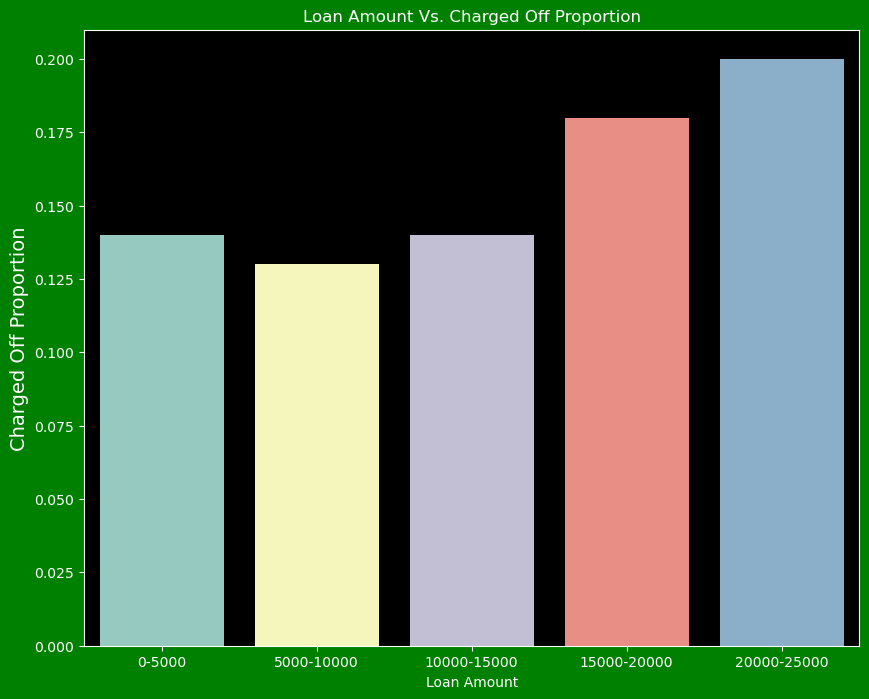

In [1351]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='GREEN')
  ax.set(title='Loan Amount Vs. Charged Off Proportion')
  ax=sns.barplot(x='loan_amnt_cat',y='Chargedoff_Proportion',data=loan_amnt_vs_status)
  ax.set_xlabel('Loan Amount',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

### Observations

*_Loans between 20,000 and 25,000 are more likely to be charged off than loans between 0 and 10,000. 
Notably, as loan amounts increase, so does the proportion of charged-off loans, demonstrating a clear proportional relationship._*


In [1353]:
loan_data.int_rate.describe()

count    35478.000000
mean        11.766026
std          3.591863
min          5.420000
25%          8.900000
50%         11.685000
75%         14.220000
max         24.400000
Name: int_rate, dtype: float64

In [1354]:
#Bin Creation for interest rate with 5 bins with 5 intervals
loan_data["int_rat_cat"]=pd.cut(loan_data.int_rate,[5,10,15,20,25],labels=['5-10','10-15','15-20','20-25'])
loan_data["int_rat_cat"]
int_rat_vs_status = loan_data.groupby(['int_rat_cat', 'loan_status']).int_rate.count().unstack().fillna(0).reset_index()
int_rat_vs_status['Total'] = int_rat_vs_status['Charged Off'] + int_rat_vs_status['Fully Paid']
int_rat_vs_status['Chargedoff_Proportion'] = round(int_rat_vs_status['Charged Off'] / int_rat_vs_status['Total'],2)
int_rat_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,int_rat_cat,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,5-10,808,10901,11709,0.07
1,10-15,2554,14431,16985,0.15
2,15-20,1557,4717,6274,0.25
3,20-25,204,306,510,0.40


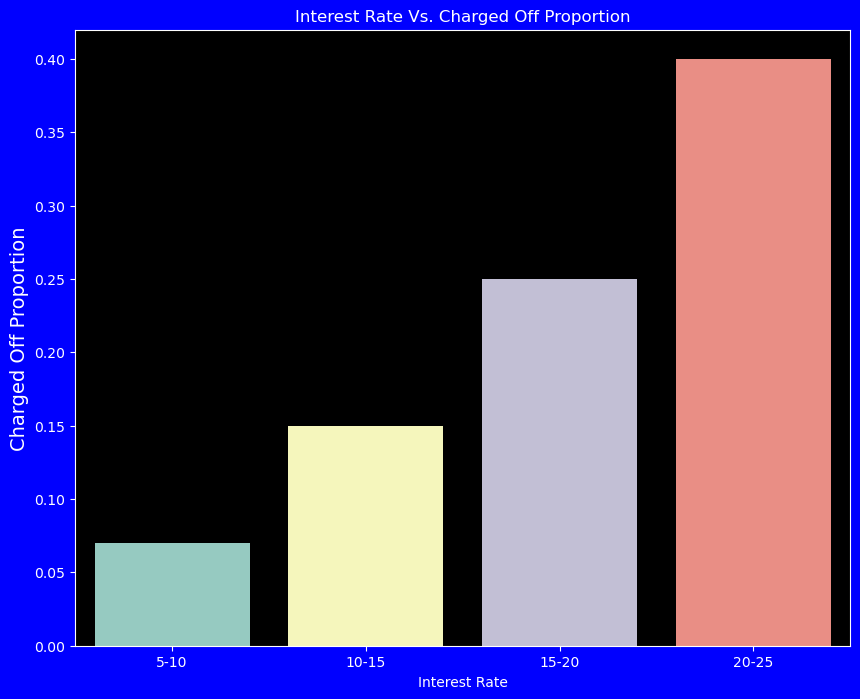

In [1355]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='blue')
  ax.set(title='Interest Rate Vs. Charged Off Proportion')
  ax=sns.barplot(x='int_rat_cat',y='Chargedoff_Proportion',data=int_rat_vs_status)
  ax.set_xlabel('Interest Rate',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

### Observations

* Interest rates between 20% and 25% are more likely to result in charge-offs compared to those below 20%. 
* It's clear that as interest rates climb, the percentage of charged-off loans follows suit, showing a direct correlation.

In [1357]:
loan_data.annual_inc.describe()

count     35478.000000
mean      59957.897740
std       27323.934476
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [1358]:
#Bin Creation for annual income with 5 bins with 5 intervals
loan_data["annual_inc"]=pd.cut(loan_data.annual_inc,[0,20000,40000,60000,80000,100000,120000,140000],labels=['0-20K','20-40K','40-60K','60-80K','80-100K','100-120K','120-140K'])
annual_inc_vs_status = loan_data.groupby(['annual_inc', 'loan_status']).annual_inc.count().unstack().fillna(0).reset_index()
annual_inc_vs_status['Total'] = annual_inc_vs_status['Charged Off'] + annual_inc_vs_status['Fully Paid']
annual_inc_vs_status['Chargedoff_Proportion'] = round(annual_inc_vs_status['Charged Off'] / annual_inc_vs_status['Total'],2)
annual_inc_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,annual_inc,Charged Off,Fully Paid,Total,Chargedoff_Proportion
5,100-120K,198,1925,2123,0.09
4,80-100K,460,3741,4201,0.11
6,120-140K,116,956,1072,0.11
3,60-80K,934,6368,7302,0.13
2,40-60K,1676,9443,11119,0.15
1,20-40K,1506,6989,8495,0.18
0,0-20K,233,933,1166,0.20


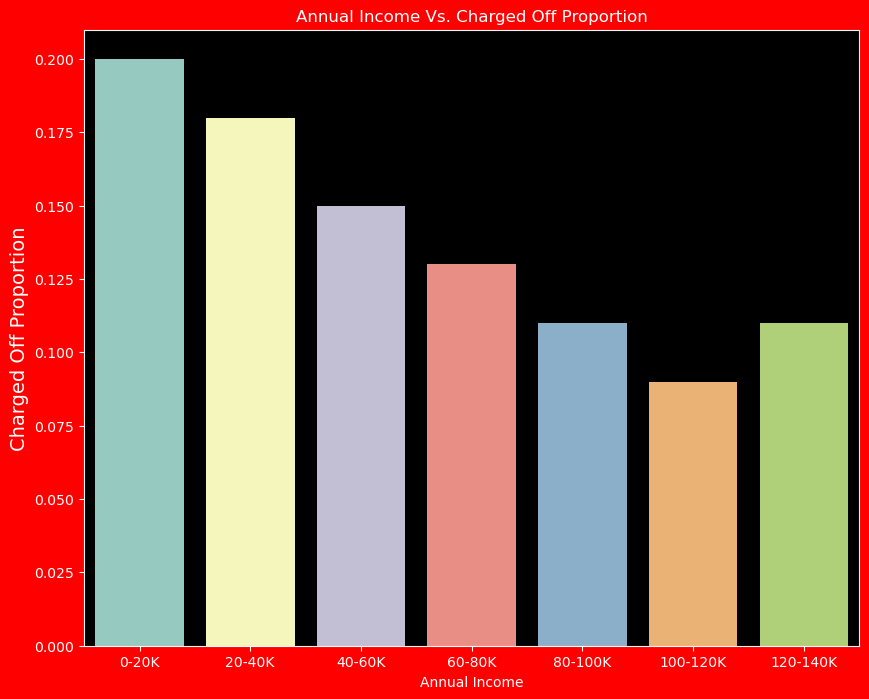

In [1359]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='red')
  ax.set(title='Annual Income Vs. Charged Off Proportion')
  ax=sns.barplot(x='annual_inc',y='Chargedoff_Proportion',data=annual_inc_vs_status)
  ax.set_xlabel('Annual Income',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

Observations

    It's clear that as annual income increases, the percentage of charged-off loans decreases, showing a negative correlation.


In [1361]:
loan_data.purpose.describe()

count                  35478
unique                    14
top       debt_consolidation
freq                   16611
Name: purpose, dtype: object

In [1362]:
purpose_vs_status = loan_data.groupby(['purpose', 'loan_status']).purpose.count().unstack().fillna(0).reset_index()
purpose_vs_status['Total'] = purpose_vs_status['Charged Off'] + purpose_vs_status['Fully Paid']
purpose_vs_status['Chargedoff_Proportion'] = round(purpose_vs_status['Charged Off'] / purpose_vs_status['Total'],2)
purpose_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
13,wedding,90,792,882,0.10
0,car,158,1286,1444,0.11
1,credit_card,498,4155,4653,0.11
6,major_purchase,214,1803,2017,0.11
4,home_improvement,305,2149,2454,0.12
12,vacation,52,311,363,0.14
2,debt_consolidation,2497,14114,16611,0.15
5,house,51,271,322,0.16
7,medical,100,533,633,0.16
8,moving,89,457,546,0.16


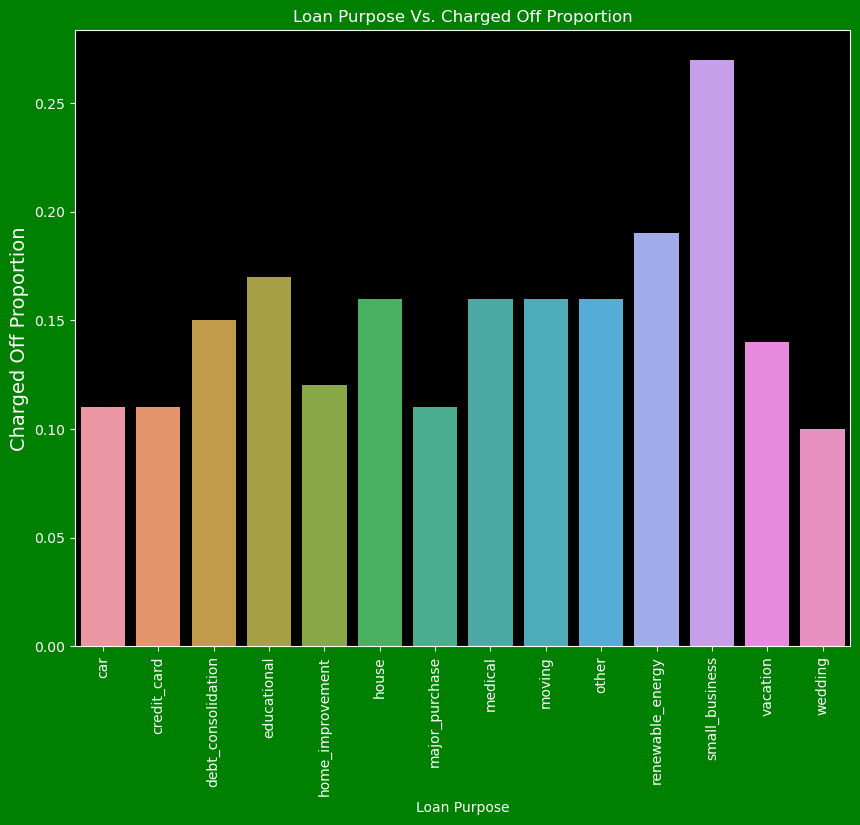

In [1363]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='green')
  ax.set(title='Loan Purpose Vs. Charged Off Proportion')
  ax=sns.barplot(x='purpose',y='Chargedoff_Proportion',data=purpose_vs_status)
  ax.set_xlabel('Loan Purpose',fontsize=10,color='w')
  plt.xticks(rotation=90)
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

### Observation
## Analysis of Loan Default Proportions vs Loan Purpose

* *Small business loans are at a higher proportion of charged off loans.*
* *Wedding loans have the least proportion of charged off loans.*



In [1365]:
loan_data.grade.describe()

count     35478
unique        7
top           B
freq      10863
Name: grade, dtype: object

In [1366]:
grade_vs_status = loan_data.groupby(['grade', 'loan_status']).grade.count().unstack().fillna(0).reset_index()
grade_vs_status['Total'] = grade_vs_status['Charged Off'] + grade_vs_status['Fully Paid']
grade_vs_status['Chargedoff_Proportion'] = round(grade_vs_status['Charged Off'] / grade_vs_status['Total'],2)
grade_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,A,590,8967,9557,0.06
1,B,1339,9524,10863,0.12
2,C,1278,6008,7286,0.18
3,D,1027,3619,4646,0.22
4,E,573,1585,2158,0.27
5,F,238,512,750,0.32
6,G,78,140,218,0.36


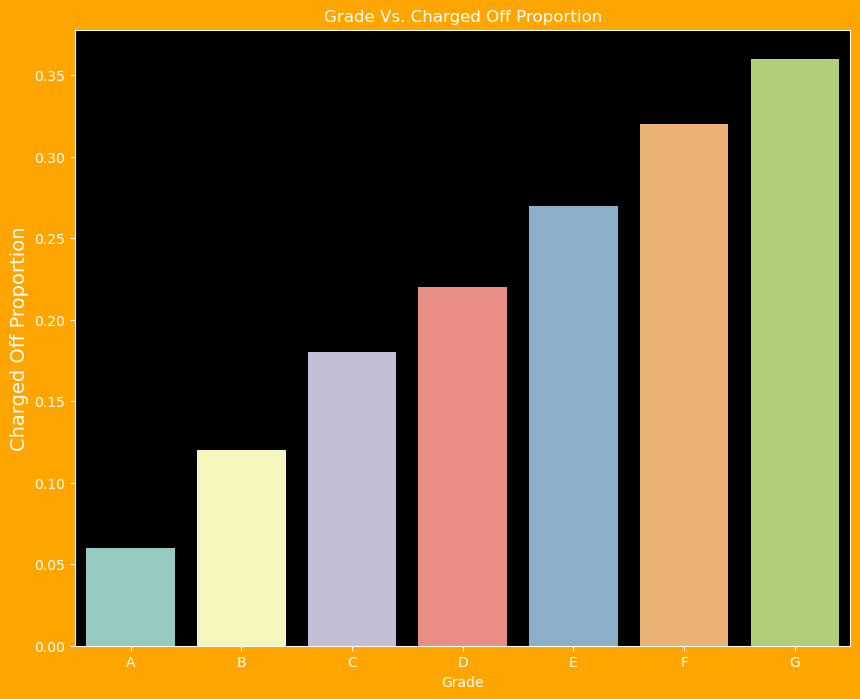

In [1367]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='orange')
  ax.set(title='Grade Vs. Charged Off Proportion')
  ax=sns.barplot(x='grade',y='Chargedoff_Proportion',data=grade_vs_status)
  ax.set_xlabel('Grade',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.show()

### Observation
## Analysis of Loan Default Proportions vs Grade

* *Loans with **Grade A** have the lowest risk of being charged off.*
* *Loans with **Grade F** and **Grade G** have the highest risk of being charged off.*
* *The likelihood of a loan being charged off increases progressively from **Grade A** to **Grade G**.*


In [1369]:
loan_data.sub_grade.describe()

count     35478
unique       35
top          A4
freq       2705
Name: sub_grade, dtype: object

In [1370]:
sub_grade_vs_status = loan_data.groupby(['sub_grade', 'loan_status']).sub_grade.count().unstack().fillna(0).reset_index()
sub_grade_vs_status['Total'] = sub_grade_vs_status['Charged Off'] + sub_grade_vs_status['Fully Paid']
sub_grade_vs_status['Chargedoff_Proportion'] = round(sub_grade_vs_status['Charged Off'] / sub_grade_vs_status['Total'],2)
sub_grade_vs_status.sort_values(by='Chargedoff_Proportion')


loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,A1,30,1067,1097,0.03
1,A2,73,1370,1443,0.05
2,A3,102,1640,1742,0.06
3,A4,172,2533,2705,0.06
4,A5,213,2357,2570,0.08
5,B1,165,1527,1692,0.10
6,B2,215,1662,1877,0.11
7,B3,311,2269,2580,0.12
9,B5,338,2093,2431,0.14
8,B4,310,1973,2283,0.14


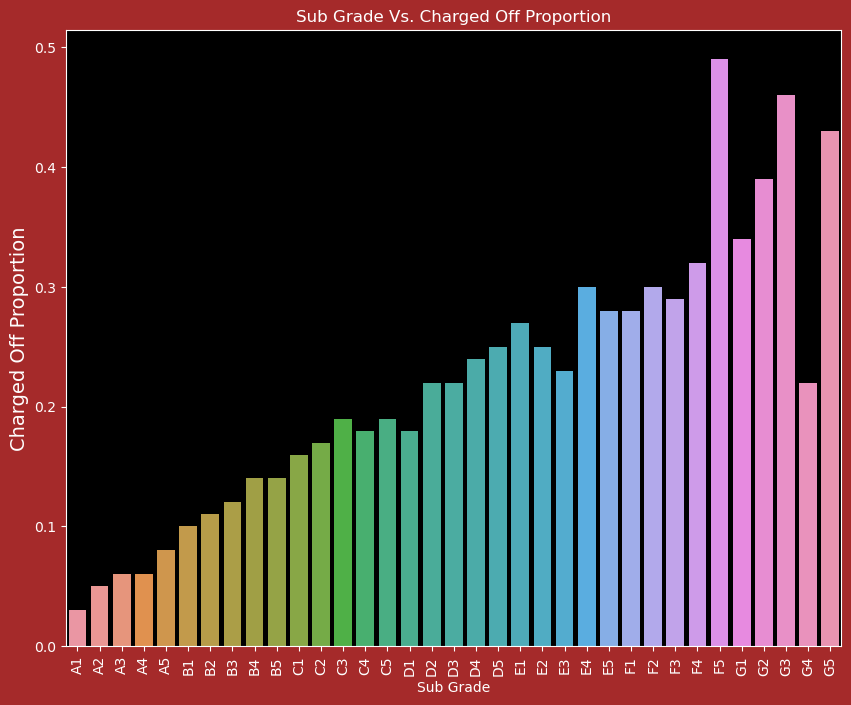

In [1371]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='brown')
  ax.set(title='Sub Grade Vs. Charged Off Proportion')
  ax=sns.barplot(x='sub_grade',y='Chargedoff_Proportion',data=sub_grade_vs_status)
  ax.set_xlabel('Sub Grade',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')
  plt.xticks(rotation=90)
  plt.show()

Analysis of Loan Default Proportions vs Sub Grade

    Loans with Sub Grade A have the lowest risk of being charged off.
    Loans with Sub Grade F and Grade G have the highest risk of being charged off.
    The likelihood of a loan being charged off increases progressively from Sub Grade A to Sub Grade G.


In [1373]:
loan_data.emp_length.describe()

count    35478.000000
mean         5.118327
std          3.433228
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [1374]:
emp_len_vs_status=loan_data.groupby(["emp_length","loan_status"]).emp_length.count().unstack().fillna(0).reset_index()
emp_len_vs_status["Total"]=emp_len_vs_status["Charged Off"]+emp_len_vs_status["Fully Paid"]
emp_len_vs_status['Chargedoff_Proportion'] = round(emp_len_vs_status['Charged Off'] / emp_len_vs_status['Total'],2)
emp_len_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,2,525,3495,4020,0.13
8,9,143,983,1126,0.13
0,1,1029,6194,7223,0.14
2,3,513,3224,3737,0.14
3,4,422,2684,3106,0.14
4,5,421,2527,2948,0.14
5,6,280,1725,2005,0.14
7,8,184,1103,1287,0.14
6,7,238,1352,1590,0.15
9,10,1368,7068,8436,0.16


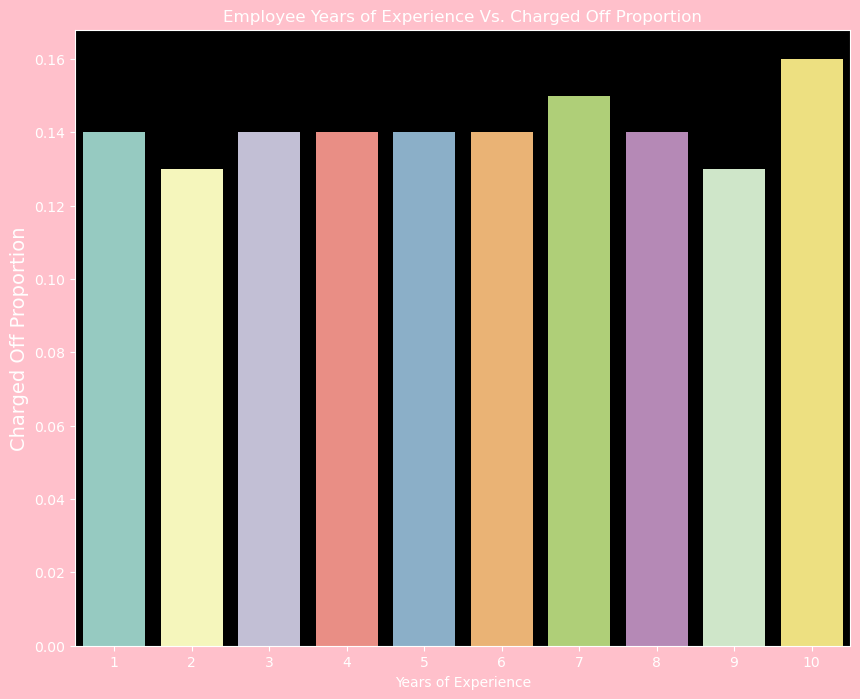

In [1375]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='pink')
  ax.set(title='Employee Years of Experience Vs. Charged Off Proportion')
  ax=sns.barplot(x='emp_length',y='Chargedoff_Proportion',data=emp_len_vs_status)
  ax.set_xlabel('Years of Experience',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

#### Observations
* *Those who are unemployed or have less than one year of experience are more likely to be charged off.*
    * *It makes sense, given that they have little or no expertise and no source of income to repay the debt.*
* *The rest of the applicants have almost equal chances of being charged off.*

In [1377]:
loan_data.verification_status.describe()

count            35478
unique               3
top       Not Verified
freq             16243
Name: verification_status, dtype: object

In [1378]:
ver_status_vs_status=loan_data.groupby(["verification_status","loan_status"]).verification_status.count().unstack().fillna(0).reset_index()
ver_status_vs_status["Total"]=ver_status_vs_status["Charged Off"]+ver_status_vs_status["Fully Paid"]
ver_status_vs_status["Chargedoff_Proportion"]=round(ver_status_vs_status["Charged Off"]/ver_status_vs_status["Total"],2)
ver_status_vs_status.sort_values(by='Chargedoff_Proportion')

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,Not Verified,2087,14156,16243,0.13
1,Source Verified,1333,7655,8988,0.15
2,Verified,1703,8544,10247,0.17


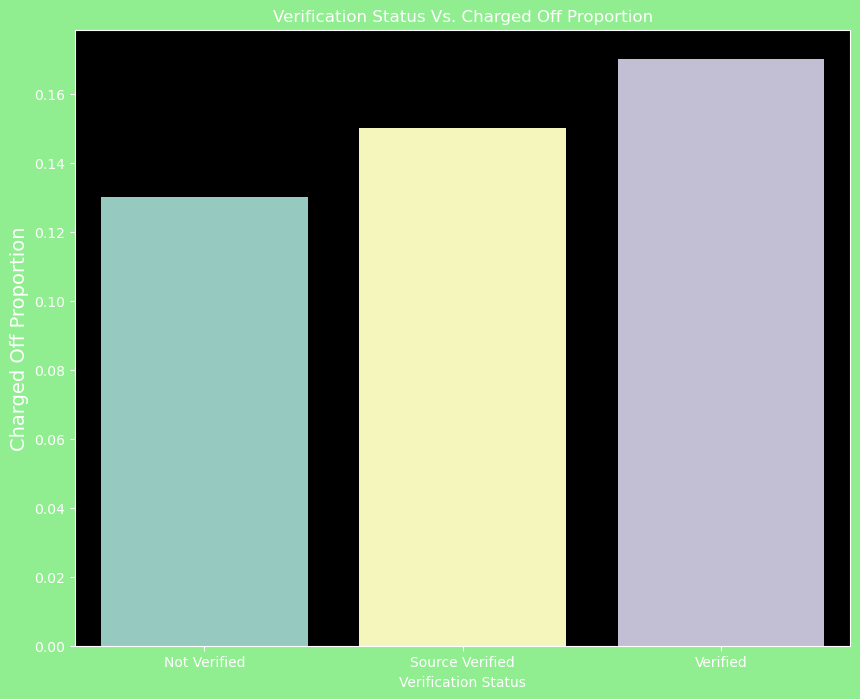

In [1379]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='lightgreen')
  ax.set(title='Verification Status Vs. Charged Off Proportion')
  ax=sns.barplot(x='verification_status',y='Chargedoff_Proportion',data=ver_status_vs_status)
  ax.set_xlabel('Verification Status',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

Observations

    There is no clear insight with these parameters.

In [1381]:
loan_data.addr_state.describe()

count     35478
unique       50
top          CA
freq       6357
Name: addr_state, dtype: object

In [1382]:
add_vs_status=loan_data.groupby(["addr_state","loan_status"]).addr_state.count().unstack().fillna(0).reset_index()
add_vs_status["Total"]=add_vs_status["Charged Off"]+add_vs_status["Fully Paid"]
add_vs_status["Charged_Off_Propotion"]=round(add_vs_status["Charged Off"]/add_vs_status["Total"],2)
add_vs_status.sort_values(by='Charged_Off_Propotion')

loan_status,addr_state,Charged Off,Fully Paid,Total,Charged_Off_Propotion
21,ME,0.0,3.0,3.0,0.00
12,IA,0.0,5.0,5.0,0.00
15,IN,0.0,9.0,9.0,0.00
49,WY,3.0,74.0,77.0,0.04
7,DC,11.0,173.0,184.0,0.06
8,DE,11.0,96.0,107.0,0.10
1,AL,46.0,357.0,403.0,0.11
2,AR,25.0,197.0,222.0,0.11
42,TX,269.0,2116.0,2385.0,0.11
26,MT,9.0,70.0,79.0,0.11


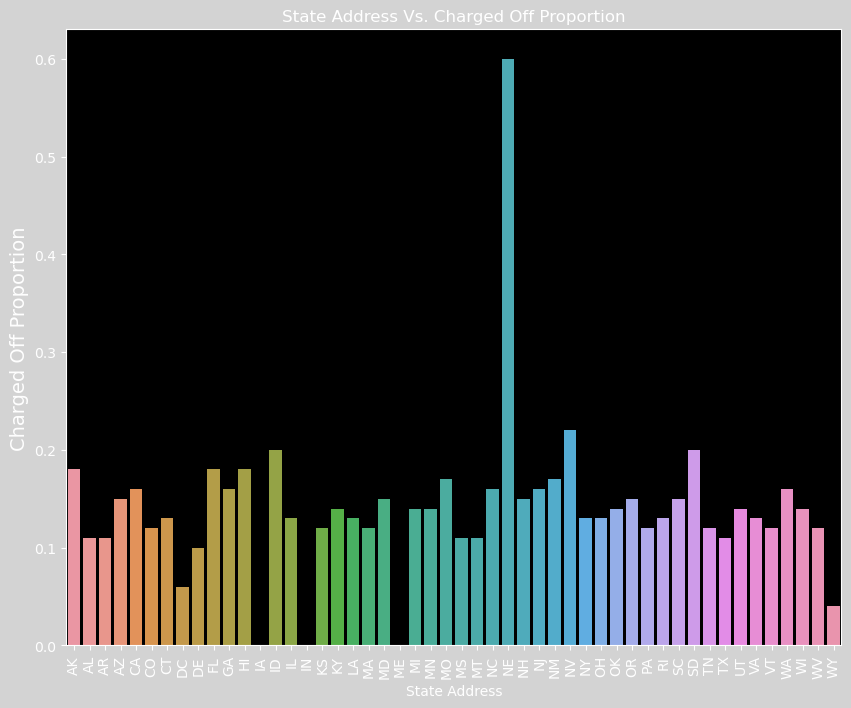

In [1383]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='lightgray')
  ax.set(title='State Address Vs. Charged Off Proportion')
  ax=sns.barplot(x='addr_state',y='Charged_Off_Propotion',data=add_vs_status)
  plt.xticks(rotation=90)
  ax.set_xlabel('State Address',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')


 * *States NE are most likely to be charged off, but there aren't enough applications to make a determination.*
* *New York, California, and Florida have significant charge-off rates on their applications.*



In [1385]:
loan_data.pub_rec.describe()

count    35478.000000
mean         0.057670
std          0.242136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [1386]:
pub_vs_status=loan_data.groupby(["pub_rec","loan_status"]).pub_rec.count().unstack().fillna(0).reset_index()
pub_vs_status["Total"]=pub_vs_status["Charged Off"]+pub_vs_status["Fully Paid"]
pub_vs_status["Charged_Off_Propotion"]=round(pub_vs_status["Charged Off"]/pub_vs_status["Total"],2)
pub_vs_status.sort_values(by='Charged_Off_Propotion')

loan_status,pub_rec,Charged Off,Fully Paid,Total,Charged_Off_Propotion
3,3,0.0,6.0,6.0,0.00
4,4,0.0,2.0,2.0,0.00
0,0,4679.0,28817.0,33496.0,0.14
2,2,10.0,36.0,46.0,0.22
1,1,434.0,1494.0,1928.0,0.23


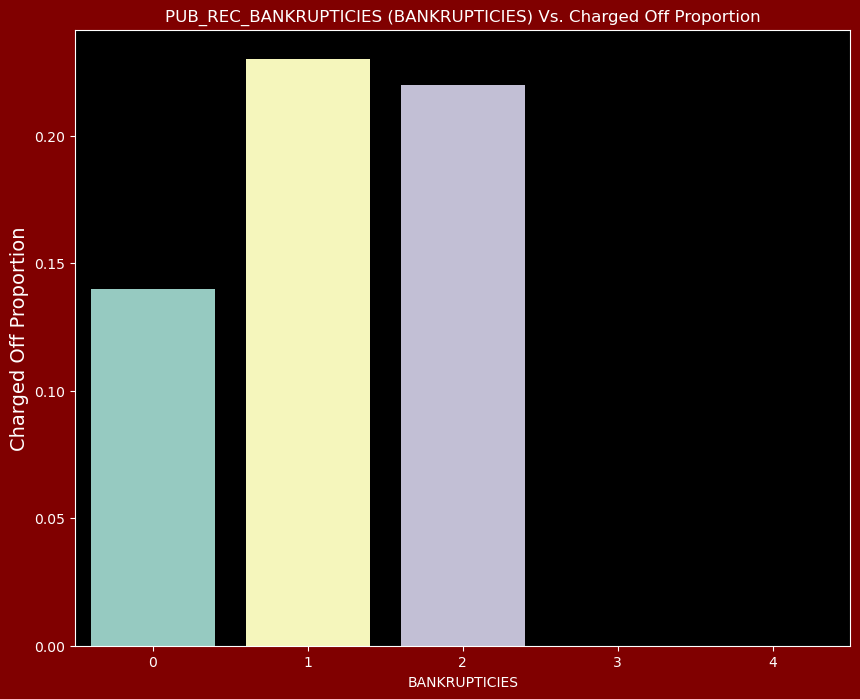

In [1387]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='maroon')
  ax.set(title='PUB_REC_BANKRUPTICIES (BANKRUPTICIES) Vs. Charged Off Proportion')
  ax=sns.barplot(x='pub_rec',y='Charged_Off_Propotion',data=pub_vs_status)
  ax.set_xlabel('BANKRUPTICIES',fontsize=10,color='w')
  ax.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

###### Observations -
Those with pub_rec_bankruptcies values 1 and 2 have higher charged-off percentage than those without pub_rec_bankruptcies.

# **<span style="background-color:green; font-size:24px;">Bi variate Analysis with Two Different components, Part Two </span>**
*_In this section, we will compare with some other bi variate components._*
* INTEREST RATE Vs PURPOSE OF LOAN
* LOAN AMOUNT Vs INTEREST RATE
* LOAN AMOUNT Vs GRADE
* EMP LENGTH (EMPLOYEE EXPERIENCE) Vs PUB_REC_BANKRUPTICIES (BANKRUPTICIES)
* ANNUAL INCOME Vs VERIFICATION STATUS

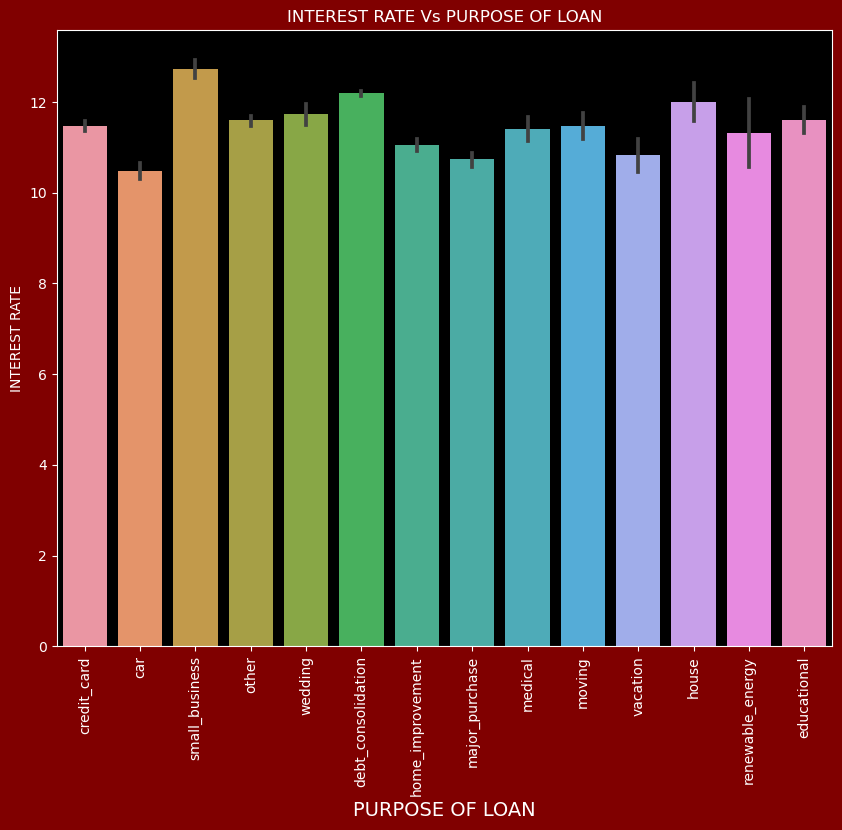

In [1390]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='maroon')
  ax.set(title='INTEREST RATE Vs PURPOSE OF LOAN')
  ax=sns.barplot(x='purpose',y='int_rate',data=loan_data)
  ax.set_ylabel('INTEREST RATE',fontsize=10,color='w')
  ax.set_xlabel('PURPOSE OF LOAN',fontsize=14,color='w')
  plt.xticks(rotation=90)

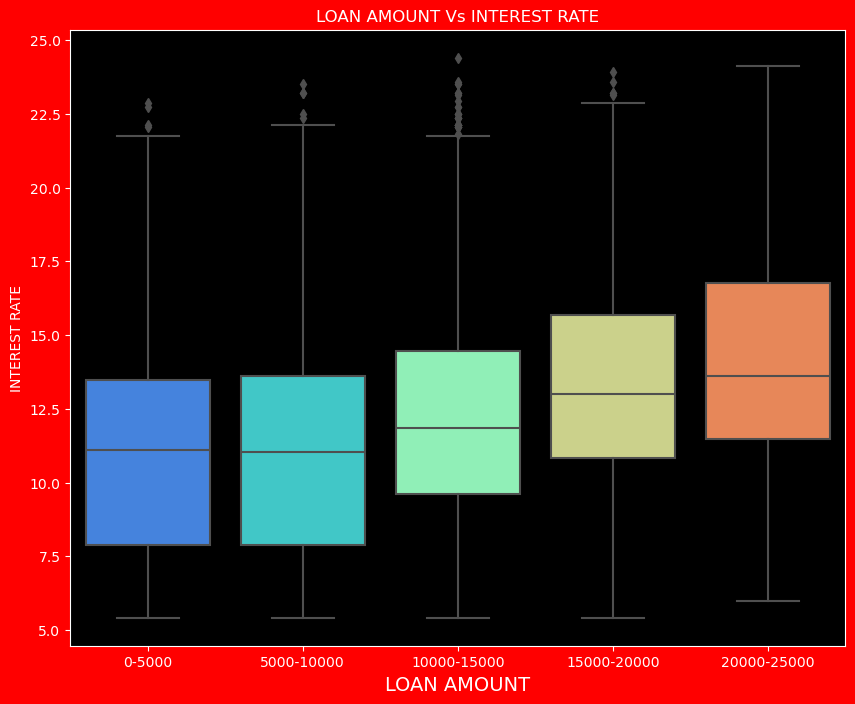

In [1391]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='red')
  ax.set(title='LOAN AMOUNT Vs INTEREST RATE')
  ax=sns.boxplot(x='loan_amnt_cat',y='int_rate',data=loan_data,palette='rainbow')
  ax.set_ylabel('INTEREST RATE',fontsize=10,color='w')
  ax.set_xlabel('LOAN AMOUNT',fontsize=14,color='w')

In [1392]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35478 non-null  int64   
 1   funded_amnt           35478 non-null  int64   
 2   funded_amnt_inv       35478 non-null  float64 
 3   term                  35478 non-null  object  
 4   int_rate              35478 non-null  float64 
 5   installment           35478 non-null  float64 
 6   grade                 35478 non-null  object  
 7   sub_grade             35478 non-null  object  
 8   emp_title             35478 non-null  object  
 9   emp_length            35478 non-null  int64   
 10  home_ownership        35478 non-null  object  
 11  annual_inc            35478 non-null  category
 12  verification_status   35478 non-null  object  
 13  loan_status           35478 non-null  object  
 14  purpose               35478 non-null  object  
 15  title  

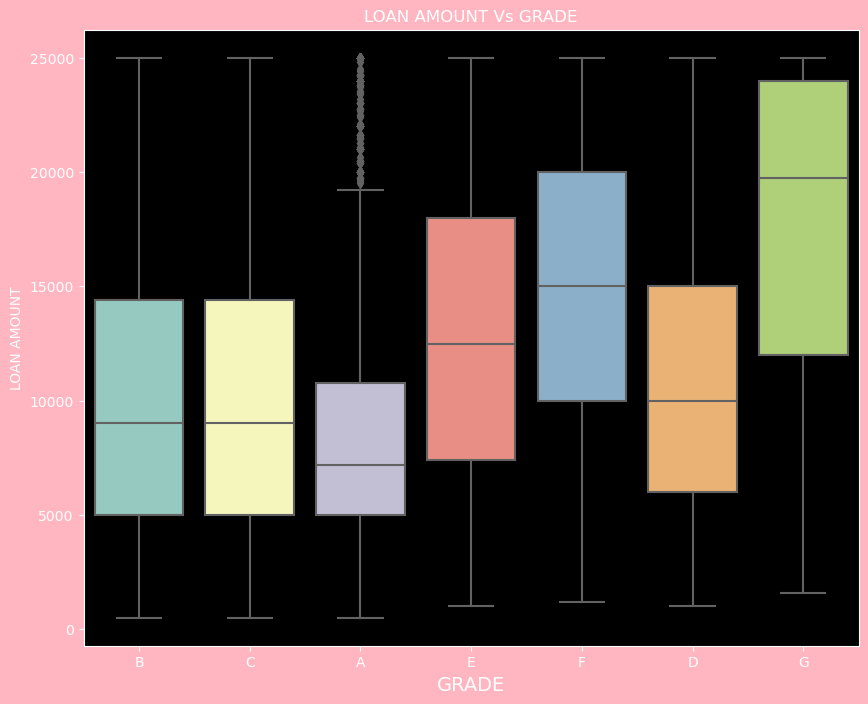

In [1393]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='lightpink')
  ax.set(title='LOAN AMOUNT Vs GRADE')
  ax=sns.boxplot(x='grade',y='loan_amnt',data=loan_data)
  ax.set_ylabel('LOAN AMOUNT',fontsize=10,color='w')
  ax.set_xlabel('GRADE',fontsize=14,color='w')

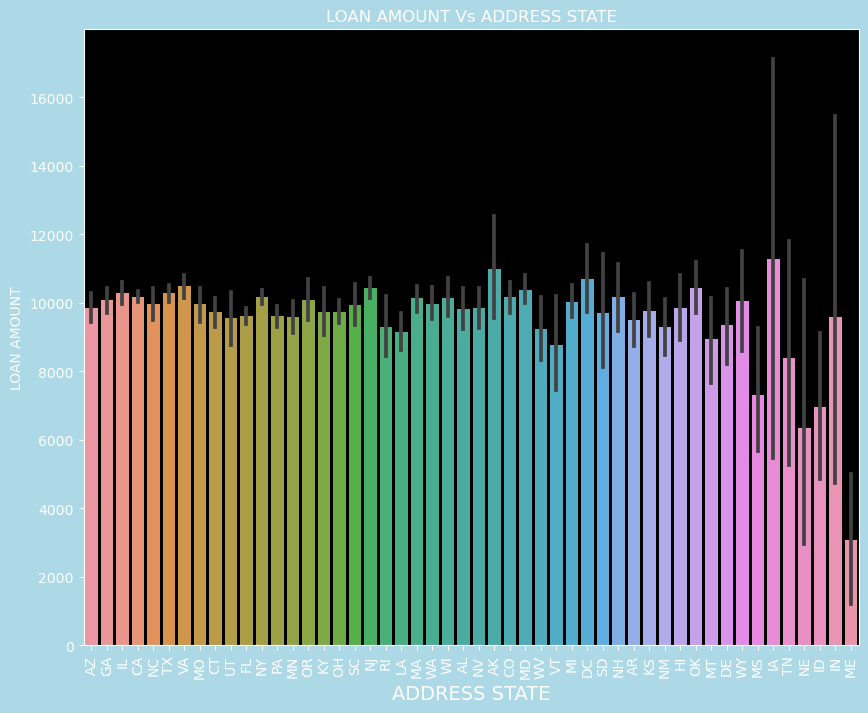

In [1394]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='lightblue')
  ax.set(title='LOAN AMOUNT Vs ADDRESS STATE')
  ax=sns.barplot(x='addr_state',y='loan_amnt',data=loan_data)
  ax.set_ylabel('LOAN AMOUNT',fontsize=10,color='w')
  ax.set_xlabel('ADDRESS STATE',fontsize=14,color='w')
  plt.xticks(rotation=90)

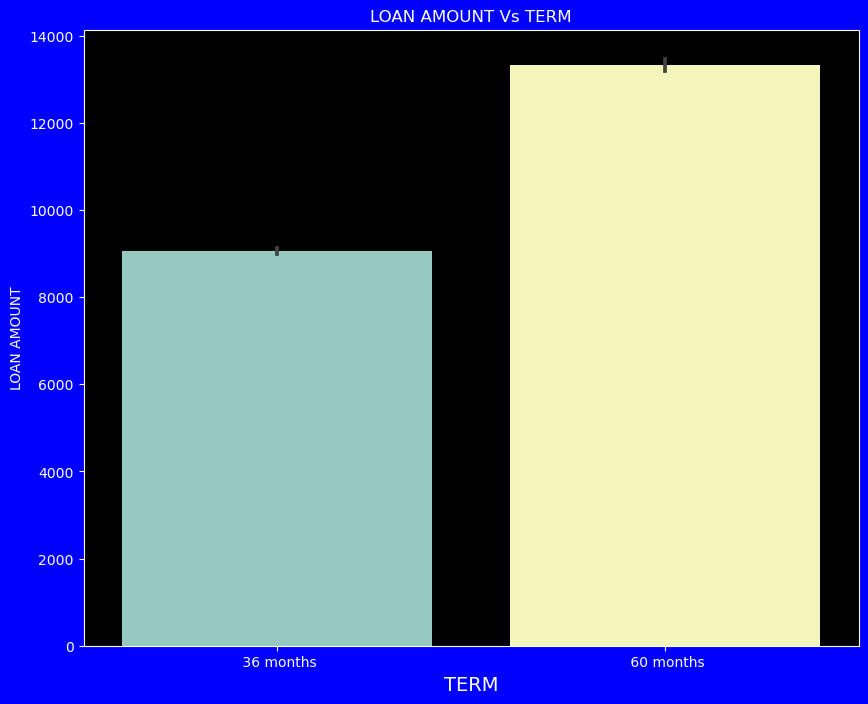

In [1395]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='blue')
  ax.set(title='LOAN AMOUNT Vs TERM')
  ax=sns.barplot(x='term',y='loan_amnt',data=loan_data)
  ax.set_ylabel('LOAN AMOUNT',fontsize=10,color='w')
  ax.set_xlabel('TERM',fontsize=14,color='w')

In [1396]:
loan_data.inq_last_6mths.describe()

count    35478.000000
mean         0.862732
std          1.061748
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

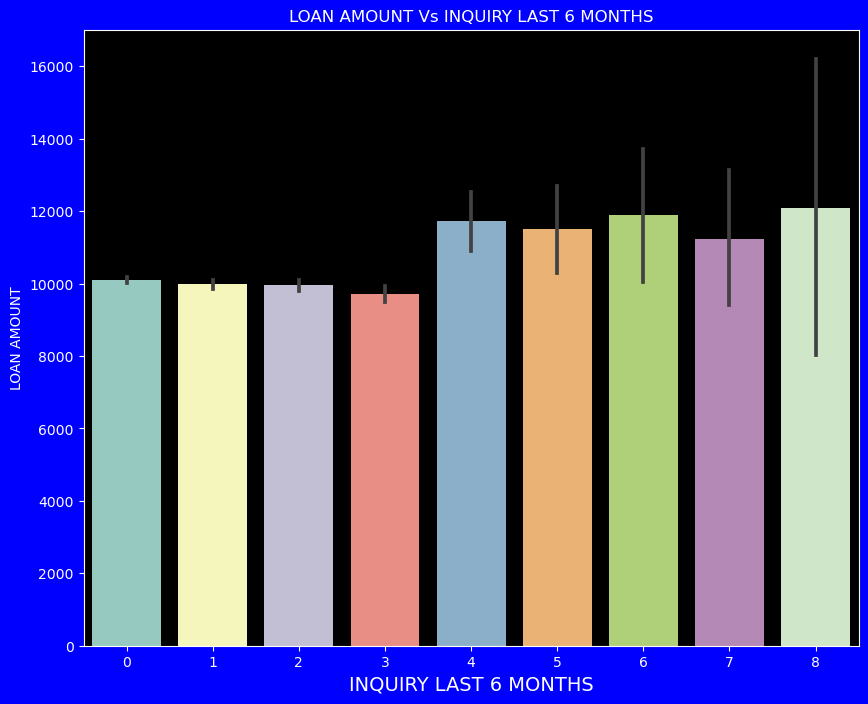

In [1397]:
with plt.style.context('dark_background'):
  fig,ax=plt.subplots(figsize=(10,8),facecolor='blue')
  ax.set(title='LOAN AMOUNT Vs INQUIRY LAST 6 MONTHS')
  ax=sns.barplot(x='inq_last_6mths',y='loan_amnt',data=loan_data)
  ax.set_ylabel('LOAN AMOUNT',fontsize=10,color='w')
  ax.set_xlabel('INQUIRY LAST 6 MONTHS',fontsize=14,color='w')

In [1398]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35478 non-null  int64   
 1   funded_amnt           35478 non-null  int64   
 2   funded_amnt_inv       35478 non-null  float64 
 3   term                  35478 non-null  object  
 4   int_rate              35478 non-null  float64 
 5   installment           35478 non-null  float64 
 6   grade                 35478 non-null  object  
 7   sub_grade             35478 non-null  object  
 8   emp_title             35478 non-null  object  
 9   emp_length            35478 non-null  int64   
 10  home_ownership        35478 non-null  object  
 11  annual_inc            35478 non-null  category
 12  verification_status   35478 non-null  object  
 13  loan_status           35478 non-null  object  
 14  purpose               35478 non-null  object  
 15  title  

In [1399]:
loan_data['dti_categories']=pd.cut(loan_data['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])
loan_data.dti_categories.describe()

count     34742
unique        5
top       10-15
freq       8898
Name: dti_categories, dtype: object

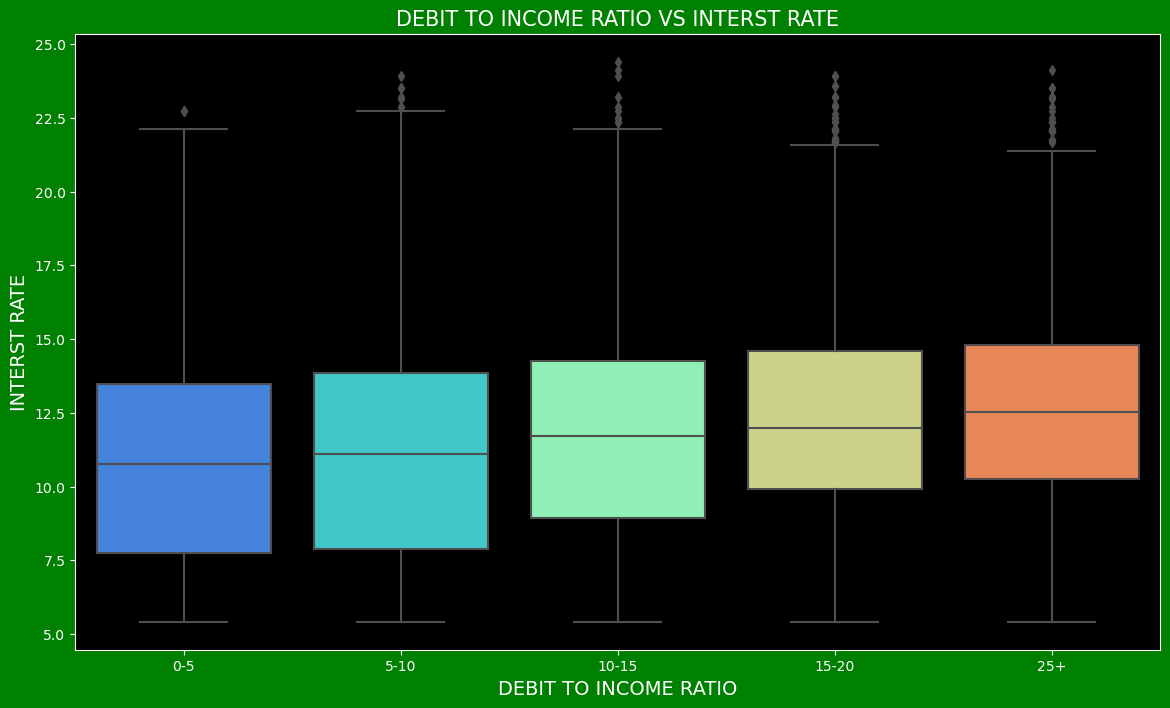

In [1400]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(14,8),facecolor='GREEN')
  ax = sns.boxplot(y='int_rate', x='dti_categories', data =loan_data,palette='rainbow')
  ax.set_title('DEBIT TO INCOME RATIO VS INTERST RATE',fontsize=15,color='w')
  ax.set_ylabel('INTERST RATE',fontsize=14,color = 'w')
  ax.set_xlabel('DEBIT TO INCOME RATIO',fontsize=14,color = 'w')
  plt.show()

In [1401]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35478 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   loan_amnt             35478 non-null  int64   
 1   funded_amnt           35478 non-null  int64   
 2   funded_amnt_inv       35478 non-null  float64 
 3   term                  35478 non-null  object  
 4   int_rate              35478 non-null  float64 
 5   installment           35478 non-null  float64 
 6   grade                 35478 non-null  object  
 7   sub_grade             35478 non-null  object  
 8   emp_title             35478 non-null  object  
 9   emp_length            35478 non-null  int64   
 10  home_ownership        35478 non-null  object  
 11  annual_inc            35478 non-null  category
 12  verification_status   35478 non-null  object  
 13  loan_status           35478 non-null  object  
 14  purpose               35478 non-null  object  
 15  title  

In [1409]:
loan_data["loan_status_val"]=loan_data["loan_status"]
loan_data['loan_status_val'] = loan_data['loan_status_val'].apply(lambda x: pd.to_numeric(0) if x=='Fully Paid' else pd.to_numeric(1))

0        0
1        1
2        0
3        0
5        0
        ..
39711    0
39712    0
39713    0
39714    0
39716    0
Name: loan_status_val, Length: 35478, dtype: int64

In [1417]:
def segmented_analysis_for_loan_status_bar_plot(x_variable):
  plt.figure(figsize=(16, 6))
  plt.xticks(rotation=90)

  title = str(x_variable) + ' vs Loan Status'
  plt.title(title)
  sns.barplot(x=str(x_variable), y='loan_status_val', data=loan_data, palette = "husl")
  plt.show()

In [1419]:
def segmented_analysis_count_plot(x_variable):
  plt.figure(figsize=(16, 6))
  plt.xticks(rotation=90)
  
  title = "countplot for " + x_variable
  plt.title(title)
  sns.countplot(x=str(x_variable), data=loan_data, palette = "flare")
  plt.show()

In [1457]:
main_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
loan_data["Seg_purpose"] = loan_data[loan_data['purpose'].isin(main_purposes)].purpose
loan_data["Seg_purpose"].value_counts()

Seg_purpose
debt_consolidation    16611
credit_card            4653
home_improvement       2454
major_purchase         2017
small_business         1515
Name: count, dtype: int64

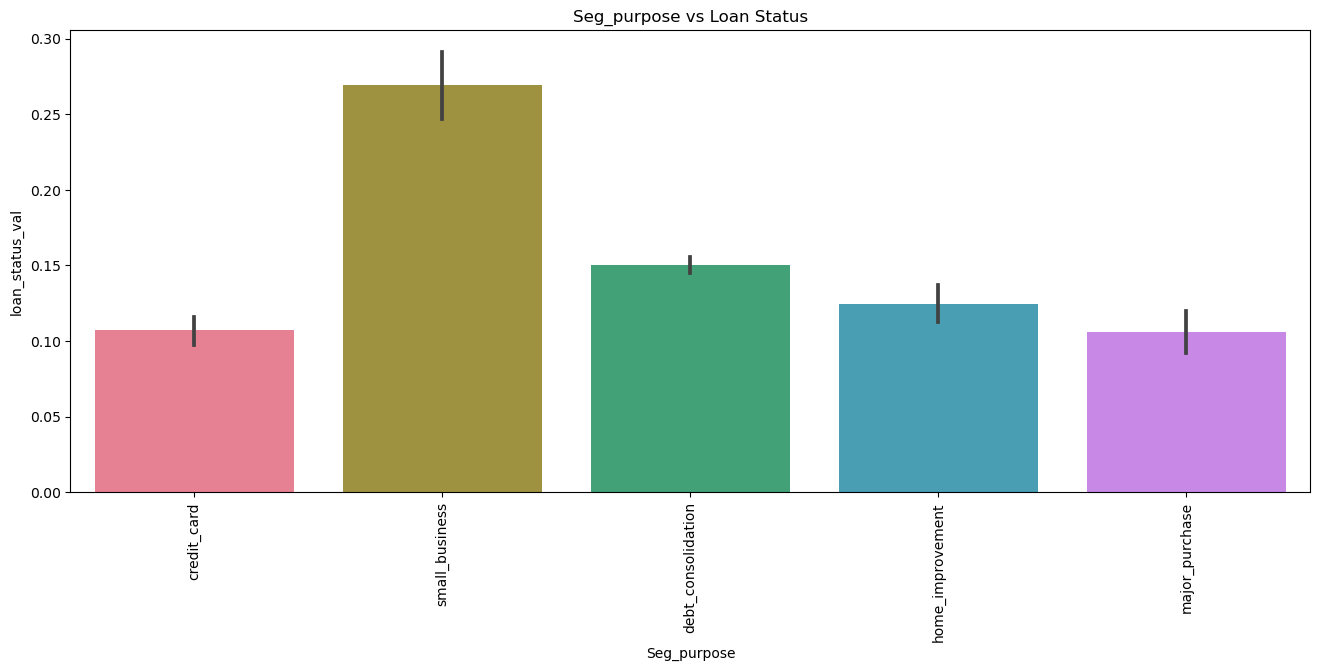

In [1445]:
segmented_analysis_for_loan_status_bar_plot("Seg_purpose")

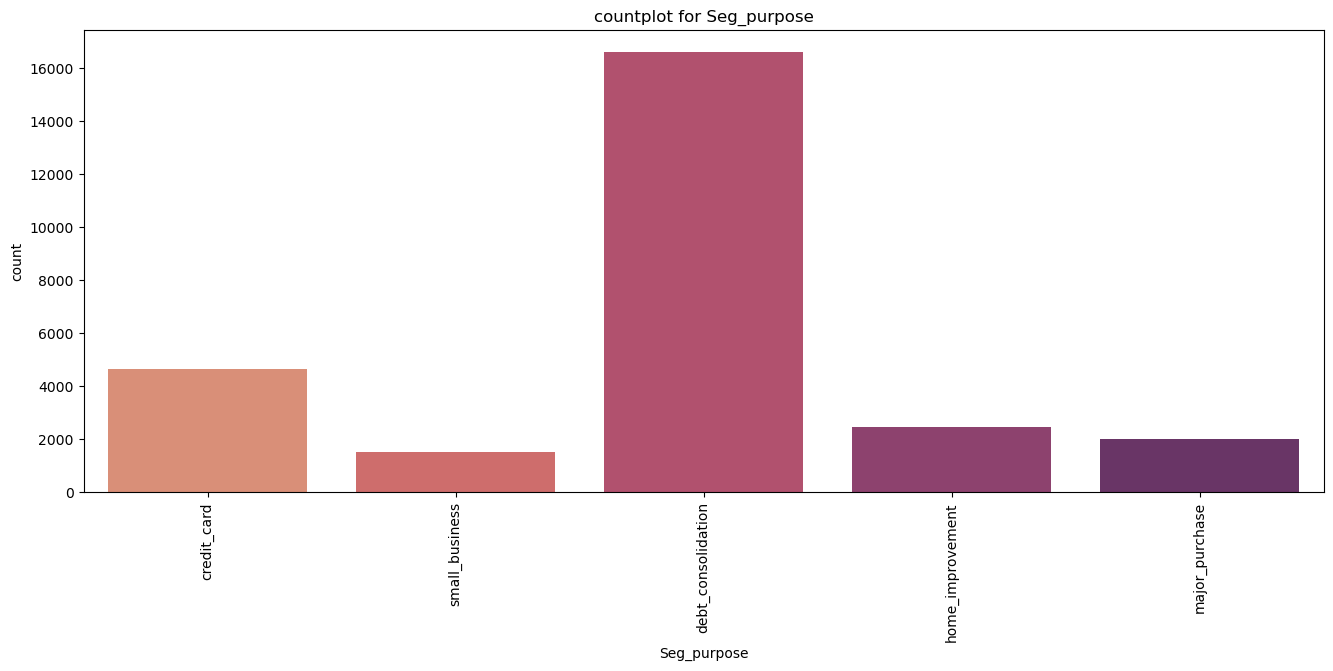

In [1447]:
segmented_analysis_count_plot("Seg_purpose")

In [1449]:
def plot_segmented_for_categorical_variable(x_variable):
  with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=90)
    title = "barplot for " + x_variable
    plt.title(title)
    sns.boxplot(x=str(x_variable), y='loan_status_val', hue='Seg_purpose', data=loan_data, palette = "husl")
    plt.show()  

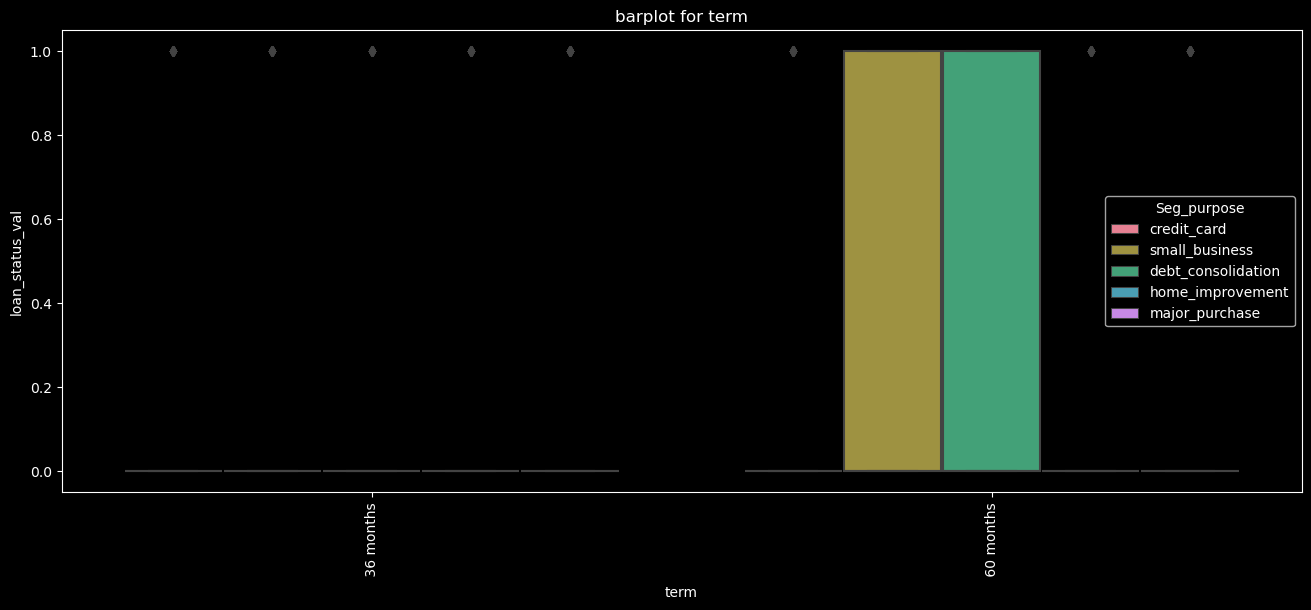

In [1451]:
plot_segmented_for_categorical_variable("term")

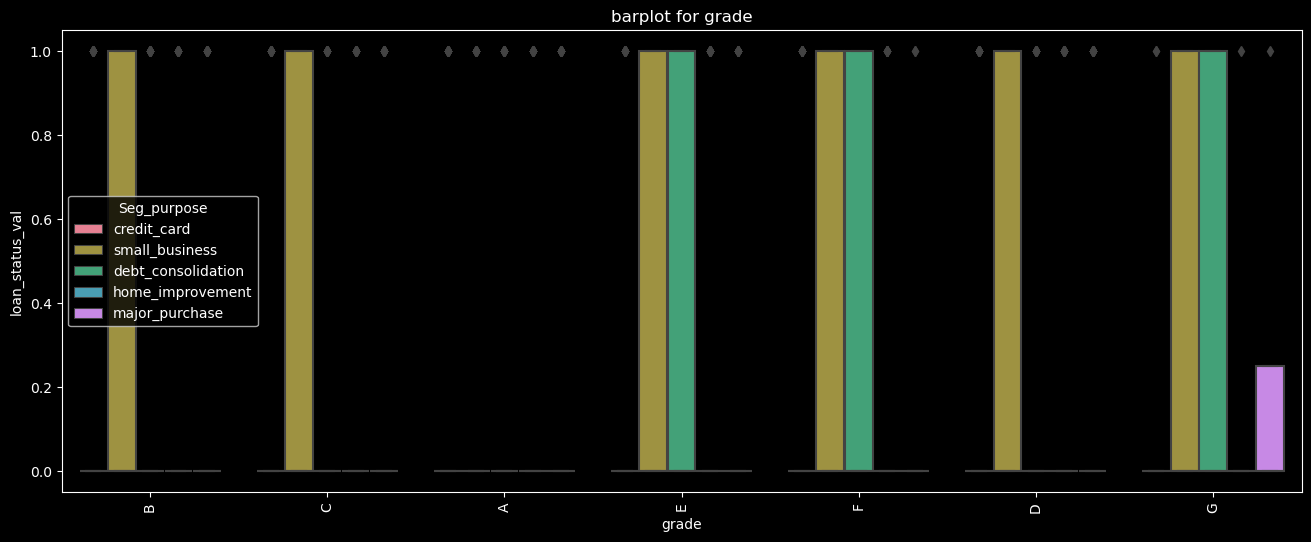

In [1453]:
plot_segmented_for_categorical_variable('grade')